#### CMSE 201 Final Project
### &#9989; Yashwanth Manne
### &#9989; Section_005
#### &#9989; 12/03/19

# ___Opioid Crisis & the Metabolism of Oxycodone___

## Background and Motivation

### Motivation:
___

I was inspired to try modeling the drug metabolism of oxycodone due to a lecture on the cytochromes p450 enzyme family given by Dr. Hoogstraten in BMB 461. I would intrigued how the dosage of any prescribed drug must take into account the rate of elimination by one of enzymes and how a slight shift in the enzyme activity could alter the blood concentration of the drug out of the desired therapeutic region to potentially dangerous levels. I wanted to focus on opioids specifically because of the ongoing crisis in our country and I wanted to undestand why opioid overdoses are so common and what role the therapeutic window of an opioid plays. I decided to focus on oxycodone specifically since it is one of the most commonly prescribed opioid and was recently mentioned in the Purdue Pharma OxyContin scandal. Furthermore, because it was such a well-known opioid, I expected there to be a lot of research that I could look into for building my model.

Additionally, I wished to get a better understanding of the opioid crisis. So, I decided to try to find some data on opioid fatality rates and sales over the past 20 years and try to see if there was a pattern or if some regions of the country were more affected than others.

### Relevant background:
___
In order to understand my project, I will briefly define a few terms.
* Opioid Crisis: More than 130 people in the United States die daily after overdosing on opioids. This costs the United States 78.5 billion dollars a year, including the costs of healthcare, lost productivity, addiction treatment, and criminal justice involvement. It resulted from widespread diversion and misuse after pharmaceutical companies ignored the addictiveness of the compounds and falsely advertised their safety.
* Cytochrome p450: This is a family of enzymes present in the liver that metabolize the majority of drugs and toxins in our body to an excretable form.
* CYP3A4: This is one of the specific enzymes that plays a major role in the metabolism of oxycodone as well as benzodiazepines such as alprazolam.
* Therapeutic Window: This is the range of drug concentrations that can effectively treat symptomns or disease without harmful effects to the body.
* Oxycodone: It is an analgesic (pain-relieving) opioid used for the relief of moderate-to-severe pain. It was aproved by FDA in 1995 as OxyContin (Purdue Pharma) and became the best-selling narcotic pain reliever by 2001. It is metabolized by p450 pathway, but specifically by the CYP3A4 & CYP2D6 enzymes. I will be focusing on CYP34. Since CYP3A4 metabolizes a lot of drugs, oxycodone is pone to pharmacokinetic drug interactions. One such interaction is benzodiazepines. In fact, >30% of opioid overdoses involve benzodiazepines.
* Benzodiazepines: It is a class of psychoactive drugs commonly used to treat anxiety. One example is alprazolam. Between 1996 and 2013, the number of adults who filled a benzodiazepine prescription increased from 8.1 million to 13.5 million. The quantity obtained increased from 1.1 kg to 3.6 kg per 100,000 adults.
* Alprazolam (Xanax): is a very commonly used drug that is used to treat anxiety and panic disorders. In fact, in 2013, 50 million prescriptions were written for alprazolam alone. It is also metabolized by CYP3A4.
* Ritonavir: This is a protease inhibitor used to treat HIV. A side effect is that it severely inhibits CYP3A4.
* IC50/Ki: This is a reported parameter that details the concentration of an inhibitor at which the rate is halfed. 
    * $Ki = \frac{[E][I]}{[EI]}$, where [E] is the concentration of free enzyme and [I] is the concentration of inhibitor and [EI] is the concentration of inhibited enzyme complex.
* Half-life of elimination: This is a reported parameter that is the time it takes for half the initial dose to be eliminated.
* Half-life of absorption: This is a reported parameter that is the time it takes for half the dose to be absorbed into circulation.
By assuming that elimation and absorption resemble first order reactions, half-lives can be used to find the rate constant of the reaction with the formula: $\frac{ln(2)}{half-life}$.


### Questions:
___
* Is the opioid crisis an issue and are there some parts of the country that are more impacted than others?
    * How has the fatality of opioids changed over the last two decades with respect to other closely associated drugs?
    * How has the sale of opioids changed in the last two decades?
* What can help explain the high rates of overdoses for opioids?
    * How does the presence of a CYP3A4 inhibitor affect the metabolism of oxycodone?
    * How does a competing substrate like alprazolam affect the metabolism of oxycodone and can this explain why more than 30 percent of overdoses involving opioids also involve benzodiazepines?


## Methodology

In [1]:
# Import all necessary libaries
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Opioid Crisis
___
The first step is to visualize the impact that of the opioid crisis across the United States in terms of drug fatality rates and drug sales over the last two decades. This was done using a dataset from the State Health Access Data Assistance Center (SHADAC). Specifically, the data can be found at [Opioid-related and other drug poisoning deaths per 100,000 people](http://statehealthcompare.shadac.org/map/197/opioidrelated-and-other-drug-poisoning-deaths-per-100000-people-by-drug-type#125/24/233) and [Prescription opioid painkiller sales in kilograms per 100,000 people, oxycodone and hydrocodone](http://statehealthcompare.shadac.org/map/170/prescription-opioid-painkiller-sales-in-kilograms-per-100000-people-by-oxycodone-and-hydrocodone#87/24/204). While SHADAC performed its own analysis, its interface made it difficult to simultaneously compare between drug types and specific regions of the United States . Thus, Python's matplotlib library and searborn were used to plot the analysis with respect to our home state of Michigan and the cumulative United States. Additionally, specific snapshots of drug fatality rates and sales were plotted as bar graphs using the oldest data and the latest data.

#### Drug Fatality
___
The first part will be visualizing the fatality rates of five categories of drugs (listed  below) over time for Michigan, the US, and the four regions of the US (Northeast, Midwest, South, and West). Drug fatality was measured in deaths per 100,000 people. The database defines each category of drug as the following.

**Natural and semi-synthetic opioids** – This category includes common prescription painkiller pills (e.g., hydrocodone and oxycodone). It includes deaths from painkillers that were legitimately manufactured, prescribed and sold, as well as those that may have been improperly prescribed or diverted from their intended source. It also may include deaths from “counterfeit” painkiller pills that were illicitly trafficked.

**Synthetic opioids** – This category include synthetic opioids (e.g., fentanyl). However, it excludes methadone, a synthetic opioid that is used both as a painkiller and as a U.S. Food and Drug Administration-approved medication for treating opioid use disorder. It includes deaths from synthetic that were legitimately manufactured, prescribed and sold, as well as those that may have been improperly prescribed or diverted from their intended source. It also includes deaths from illicitly trafficked synthetic opioids, which may be sold inaccurately (i.e., sold as heroin when it actually is fentanyl) or combined with other drugs (i.e., mixed into heroin or counterfeit painkiller pills to increase their potency).

**Heroin** – This category includes only heroin, which has no legal medical use in the United States and is exclusively trafficked illicitly. However, heroin may be mixed with other drugs (e.g., synthetic opioids).

**Cocaine** – This category includes only cocaine, which is commonly used as an illicit recreational drug but also has some approved legal medical uses in the United States (e.g., as an anesthetic). Although cocaine is legally classified as a narcotic in the U.S., it is not pharmacologically an opioid. However, it is sometimes trafficked alongside or even mixed with illicit opioids such as heroin and fentanyl.

**Psychostimulants** – This category includes various stimulant drugs, including legal prescription medications commonly used to treat attention deficit hyperactivity disorder (ADHD), such as Ritalin (methylphenidate) and Adderall (amphetamine); and methamphetamine, which has approved legal medical uses in the United States but is commonly illicitly manufactured and/or trafficked and used recreationally. Similar to prescription opioid painkillers, prescription psychostimulants are sometimes diverted from their intended medical use and abused. These psychostimulants are not opioids but are sometimes trafficked alongside or even mixed with illicit opioids such as heroin and fentanyl.

Source: [Opioid-related and other drug poisoning deaths per 100,000 people](http://statehealthcompare.shadac.org/map/197/opioidrelated-and-other-drug-poisoning-deaths-per-100000-people-by-drug-type#125/24/233)

Original Source: The CDC WONDER Database from the National Center for Health Statistics.

In [2]:
# Read in the .csv data and skip the first 20 rows of text. Initially read in everything as 'str'
opioidperDT = pd.read_csv('./data/Opioid-related and other drug poisoning deaths per 100,000 people, by drug type.csv', 
                          skiprows = 20, dtype = 'str')
# Change the data type of some of the columns so that it will be easier to work with
opioidperDT = opioidperDT.astype({"TimeFrame": 'int',"Data": 'float',"MOE":'float'})
opioidperDT.head() # get a quick view of how the data looks

,Fips,Location,Drug Type,TimeFrame,Data Type,Data,MOE
0,01,Alabama,Cocaine,1999,"Rate per 100,000",0.51516,0.215516
1,02,Alaska,Cocaine,1999,"Rate per 100,000",NaN,NaN
2,04,Arizona,Cocaine,1999,"Rate per 100,000",2.75748,0.466495
3,05,Arkansas,Cocaine,1999,"Rate per 100,000",NaN,NaN
4,06,California,Cocaine,1999,"Rate per 100,000",1.21234,0.118646


*Masks Used:*

In [3]:
# Masks out the specific type of drug
CocaineMask = opioidperDT['Drug Type'] == 'Cocaine'
OpioidMask = opioidperDT['Drug Type'] == 'Natural and semi-synthetic opioids'
HeroinMask = opioidperDT['Drug Type'] == 'Heroin'
PsychoMask = opioidperDT['Drug Type'] == 'Psychostimulants'
SynOpioidMask = opioidperDT['Drug Type'] == 'Synthetic opioids'
# Masks out the specific year of the data (1999 is earliest time and 2017 is the newest data)
y99Mask = opioidperDT['TimeFrame'] == 1999
y17Mask = opioidperDT['TimeFrame'] == 2017
# Masks out the specific locations (Michigan and US)
US = opioidperDT['Location'] == 'United States'
Mich = opioidperDT['Location'] == 'Michigan'

# Regions According to the US Census Bureau
# Store each in lists so that they can be used to mask later
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island',
             'Connecticut','New York','New Jersey','Pennsylvania']
Midwest = ['Ohio','Michigan','Indiana','Wisconsin','Illinois','Minnesota','Iowa',
           'Missouri','North Dakota','South Dakota','Nebraska','Kansas']
South = ['Dist. of Columbia','Delaware','Maryland','Virginia','West Virginia','Kentucky','North Carolina','South Carolina',
         'Tennessee','Georgia','Florida','Alabama','Mississippi','Arkansas','Louisiana','Texas','Oklahoma']
West = ['Montana','Idaho','Wyoming','Colorado','New Mexico','Arizona','Utah',
        'Nevada','California','Oregon','Washington','Alaska','Hawaii']
# Masks out the data by location by whether or not the location of the data is in the above region lists.
NE = opioidperDT['Location'].isin(Northeast)
MW = opioidperDT['Location'].isin(Midwest)
ST = opioidperDT['Location'].isin(South)
WT = opioidperDT['Location'].isin(West)

In [4]:
# Combines year and drug type masks to get specific drugs at specific times
opioid17 = opioidperDT[y17Mask & OpioidMask]
opioid99 = opioidperDT[y99Mask & OpioidMask]

# Combines region/location and drug type masks to get data frames of specific drugs at specific regions/locations
NEOpioids = opioidperDT[NE & OpioidMask]
MWOpioids = opioidperDT[MW & OpioidMask]
STOpioids = opioidperDT[ST & OpioidMask]
WTOpioids = opioidperDT[WT & OpioidMask]

NECocaine = opioidperDT[NE & CocaineMask]
MWCocaine = opioidperDT[MW & CocaineMask]
STCocaine = opioidperDT[ST & CocaineMask]
WTCocaine = opioidperDT[WT & CocaineMask]

NEHeroin = opioidperDT[NE & HeroinMask]
MWHeroin = opioidperDT[MW & HeroinMask]
STHeroin = opioidperDT[ST & HeroinMask]
WTHeroin = opioidperDT[WT & HeroinMask]

NEPsycho = opioidperDT[NE & PsychoMask]
MWPsycho = opioidperDT[MW & PsychoMask]
STPsycho = opioidperDT[ST & PsychoMask]
WTPsycho = opioidperDT[WT & PsychoMask]

NESynOpioids = opioidperDT[NE & SynOpioidMask]
MWSynOpioids = opioidperDT[MW & SynOpioidMask]
STSynOpioids = opioidperDT[ST & SynOpioidMask]
WTSynOpioids = opioidperDT[WT & SynOpioidMask]

USOpioids = opioidperDT[US & OpioidMask]
USCocaine = opioidperDT[US & CocaineMask]
USHeroin = opioidperDT[US & HeroinMask]
USPsycho = opioidperDT[US & PsychoMask]
USSynOpioids = opioidperDT[US & SynOpioidMask]

MichOpioids = opioidperDT[Mich & OpioidMask]
MichCocaine = opioidperDT[Mich & CocaineMask]
MichHeroin = opioidperDT[Mich & HeroinMask]
MichPsycho = opioidperDT[Mich & PsychoMask]
MichSynOpioids = opioidperDT[Mich & SynOpioidMask]

Text(0.5, 1.0, 'Opioids Fatality Rate (1999)')

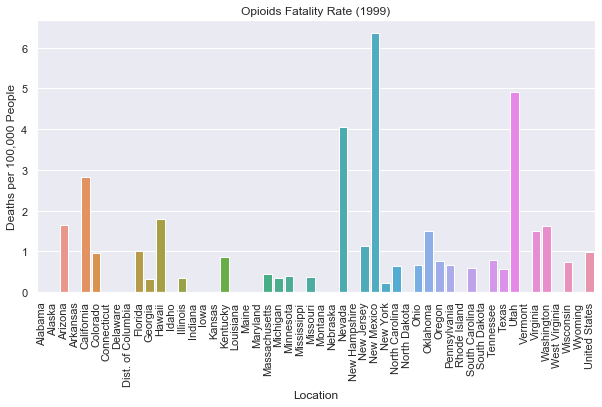

In [5]:
# Make a bar graph of each state's opioid fatality rates in 1999.
sns.set() # Uses Seaborn for better visualization
fig1 = plt.figure(figsize = (10,5)) # Names figure and sets figure size
axe1 = sns.barplot(x = opioid99['Location'], y = opioid99['Data'], orient = 'v') # Makes a bar plot with nice color spectrum  
axe1.set_xticklabels(axe1.get_xticklabels(),rotation = 'vertical') # Makes the labels easier to read by rotating them 90 deg
axe1.set_ylabel("Deaths per 100,000 People")
axe1.set_title("Opioids Fatality Rate (1999)")

Text(0.5, 1.0, 'Opioids Fatality Rate (2017)')

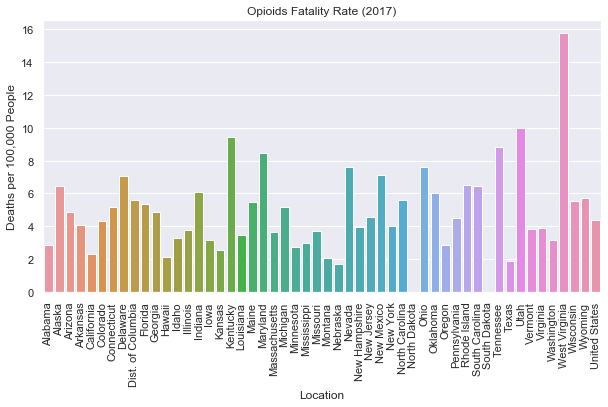

In [6]:
# Make a bar graph of each state's opioid fatality rates in 2017.
sns.set() # Uses Seaborn for better visualization
fig2 = plt.figure(figsize = (10,5)) # Names figure and sets figure size
axe2 = sns.barplot(x = opioid17['Location'], y = opioid17['Data'], orient = 'v') # Makes a bar plot with nice color spectrum
axe2.set_xticklabels(axe2.get_xticklabels(),rotation = 'vertical') # Makes the labels easier to read by rotating them 90 deg
axe2.set_ylabel("Deaths per 100,000 People")
axe2.set_title("Opioids Fatality Rate (2017)")

In [7]:
# FInds the % increase from 1999 to 2017 for Michigan and the US
M99 = opioid99[opioid99['Location'] == 'Michigan'].iloc[0]['Data']
US99 = opioid99[opioid99['Location'] == 'United States'].iloc[0]['Data']
M17 = opioid17[opioid17['Location'] == 'Michigan'].iloc[0]['Data']
US17 = opioid17[opioid17['Location'] == 'United States'].iloc[0]['Data']
print('The 1999 opioids fatality rate in Michigan was {} deaths per 100,000 people.'.format(M99))
print('The 2017 opioids fatality rate in Michigan was {} deaths per 100,000 people.'.format(M17))
print('The 1999 opioids fatality rate in the US was {} deaths per 100,000 people.'.format(US99))
print('The 2017 opioids fatality rate in the US was {} deaths per 100,000 people.'.format(US17))
print('From 1999 to 2017, the fatality rate of opioids has gone up {}% in Michigan.'.format(np.round((M17-M99)/M99*100,2)))
print('From 1999 to 2017, the fatality rate of opioids has gone up {}% in the US.'.format(np.round((US17-US99)/US99*100,2)))

The 1999 opioids fatality rate in Michigan was 0.35082 deaths per 100,000 people.
The 2017 opioids fatality rate in Michigan was 5.19889 deaths per 100,000 people.
The 1999 opioids fatality rate in the US was 0.98359 deaths per 100,000 people.
The 2017 opioids fatality rate in the US was 4.40863 deaths per 100,000 people.
From 1999 to 2017, the fatality rate of opioids has gone up 1381.93% in Michigan.
From 1999 to 2017, the fatality rate of opioids has gone up 348.22% in the US.


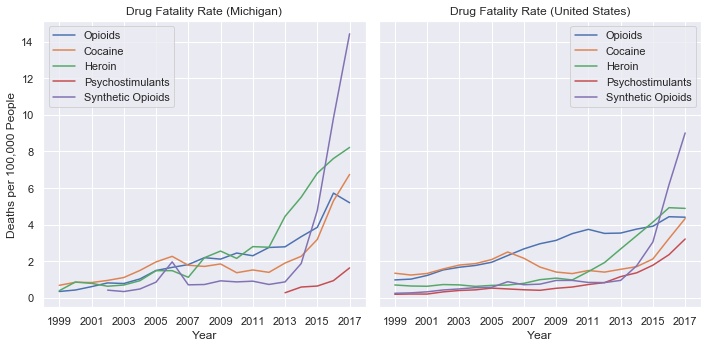

In [8]:
sns.set() # Uses Seaborn for better visualization
# Create a subplot of drug fatality rates over time for Michigan and US
fig3, ax = plt.subplots(1,2, figsize = (10,5), sharey = True) # Shares y-axis to allow better comparison between subplots.
# subplot 1 plots the fatality rate of each type of drug over time for Michigan
ax[0].plot(MichOpioids['TimeFrame'], MichOpioids['Data'], label = 'Opioids')
ax[0].plot(MichCocaine['TimeFrame'], MichCocaine['Data'], label = 'Cocaine')
ax[0].plot(MichHeroin['TimeFrame'], MichHeroin['Data'], label = 'Heroin')
ax[0].plot(MichPsycho['TimeFrame'], MichPsycho['Data'], label = 'Psychostimulants')
ax[0].plot(MichSynOpioids['TimeFrame'], MichSynOpioids['Data'], label = 'Synthetic Opioids')
ax[0].set_xlim(1998,2018) # Enables a well-spaced axis
ax[0].set_xticks(np.arange(min(MichOpioids['TimeFrame']), max(MichOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0].legend()
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Deaths per 100,000 People")
ax[0].set_title("Drug Fatality Rate (Michigan)")
# subplot 1 plots the fatality rate of each type of drug over time for the entire United States
ax[1].plot(USOpioids['TimeFrame'], USOpioids['Data'], label = 'Opioids')
ax[1].plot(USCocaine['TimeFrame'], USCocaine['Data'], label = 'Cocaine')
ax[1].plot(USHeroin['TimeFrame'], USHeroin['Data'], label = 'Heroin')
ax[1].plot(USPsycho['TimeFrame'], USPsycho['Data'], label = 'Psychostimulants')
ax[1].plot(USSynOpioids['TimeFrame'], USSynOpioids['Data'], label = 'Synthetic Opioids')
ax[1].set_xlim(1998,2018) # Enables a well-spaced axis
ax[1].set_xticks(np.arange(min(USOpioids['TimeFrame']), max(USOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1].legend()
ax[1].set_xlabel("Year")
ax[1].set_title("Drug Fatality Rate (United States)")
plt.tight_layout() # Aligns subplots nicely

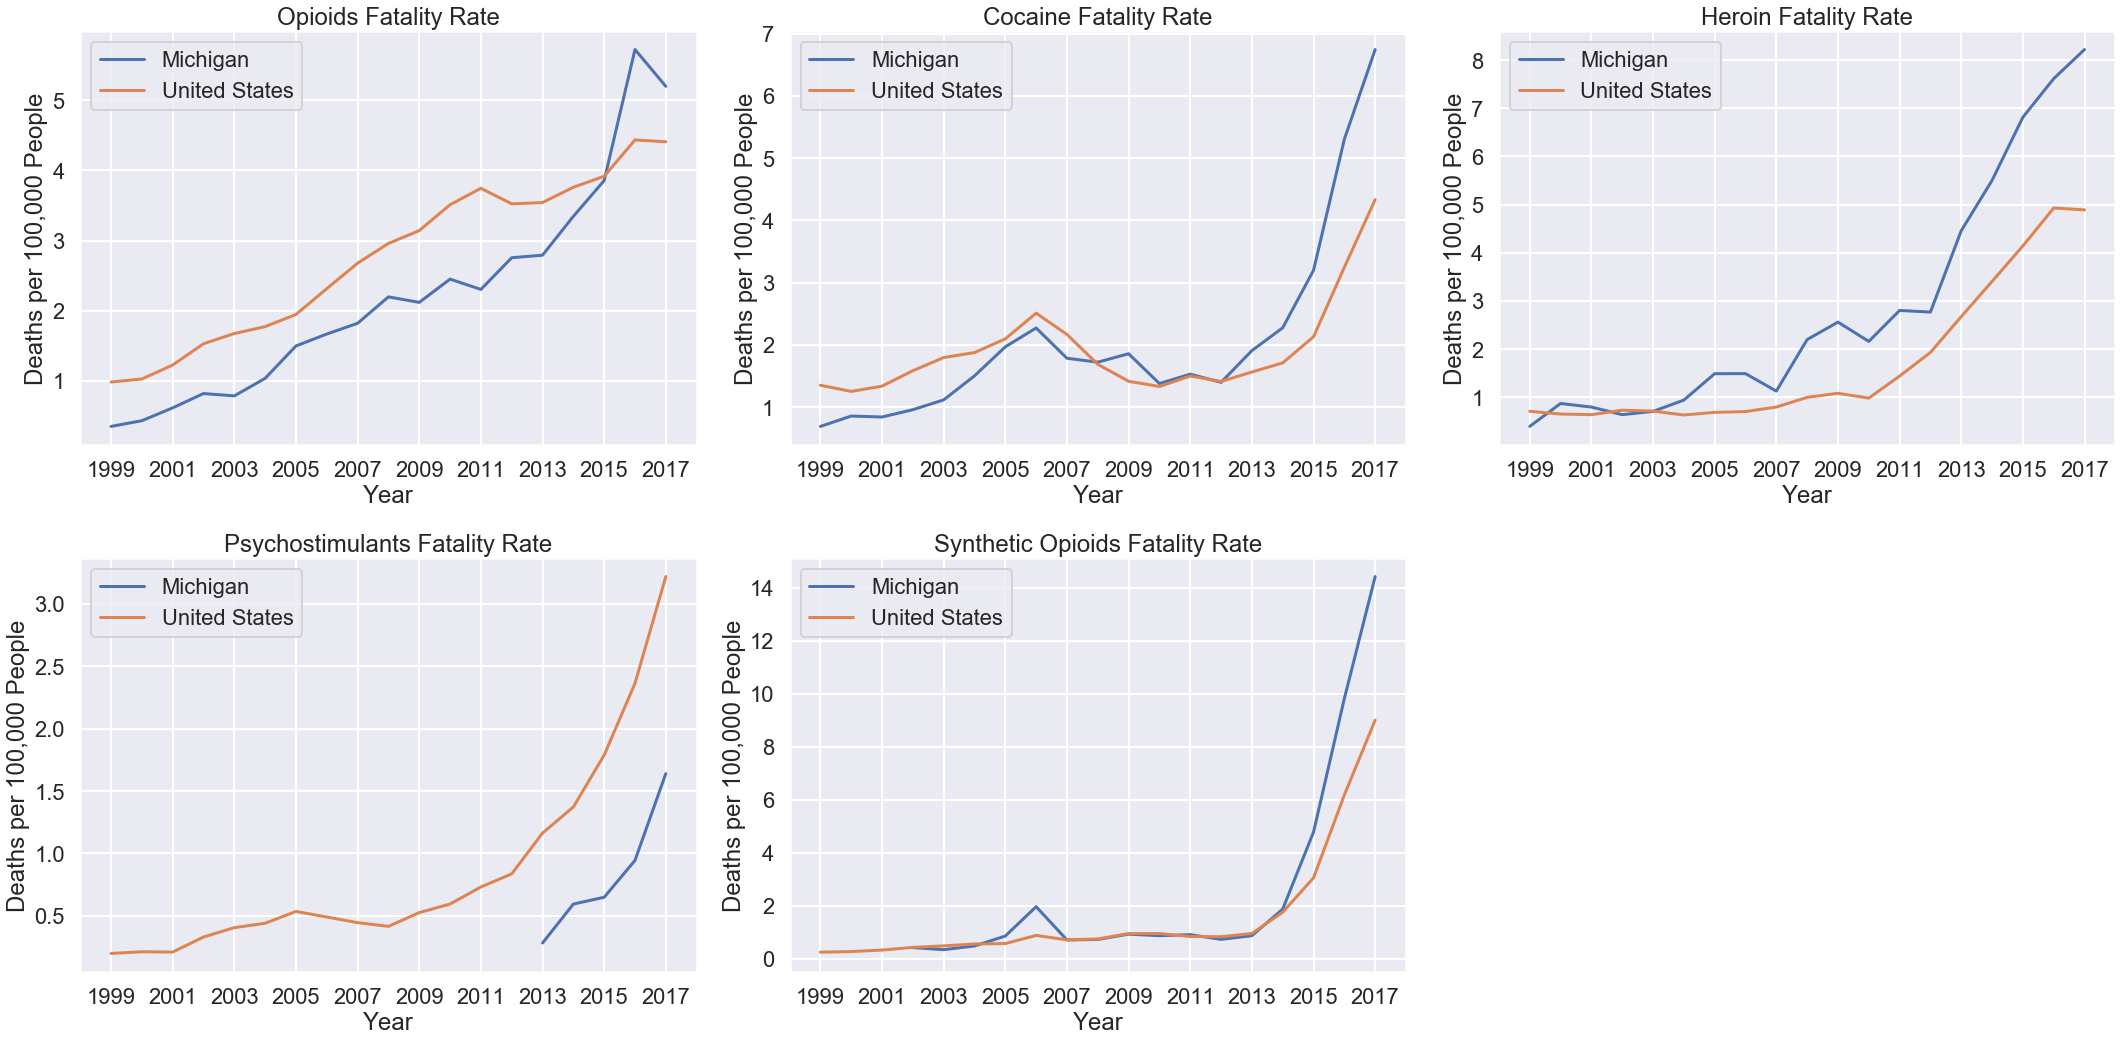

In [9]:
sns.set(context= 'poster') # 'poster' makes the lines more visible and the colors more differentiable
# Create a subplot of each drug's fatality rates over time for Michigan and US
fig4 = plt.figure(figsize = (30,15)) 
# Use this method of adding subplots to avoid having an empty plot at [1,2]
axis1 = fig4.add_subplot(231)
axis2 = fig4.add_subplot(232)
axis3 = fig4.add_subplot(233)
axis4 = fig4.add_subplot(234)
axis5 = fig4.add_subplot(235)
# PLots opioids' fatality rate over time for Michigan and US
axis1.plot(MichOpioids['TimeFrame'], MichOpioids['Data'], label = 'Michigan')
axis1.plot(USOpioids['TimeFrame'], USOpioids['Data'], label = 'United States')
axis1.set_xlim(1998,2018) # Enables a well-spaced axis
axis1.set_xticks(np.arange(min(USOpioids['TimeFrame']), max(USOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis1.legend()
axis1.set_xlabel("Year")
axis1.set_ylabel("Deaths per 100,000 People")
axis1.set_title("Opioids Fatality Rate")
# Plots cocaine's fatality rate over time for Michigan and US
axis2.plot(MichCocaine['TimeFrame'], MichCocaine['Data'], label = 'Michigan')
axis2.plot(USCocaine['TimeFrame'], USCocaine['Data'], label = 'United States')
axis2.set_xlim(1998,2018) # Enables a well-spaced axis
axis2.set_xticks(np.arange(min(USCocaine['TimeFrame']), max(USCocaine['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis2.legend()
axis2.set_xlabel("Year")
axis2.set_ylabel("Deaths per 100,000 People")
axis2.set_title("Cocaine Fatality Rate")
# Plots heroin's fatality rate over time for Michigan and US
axis3.plot(MichHeroin['TimeFrame'], MichHeroin['Data'], label = 'Michigan')
axis3.plot(USHeroin['TimeFrame'], USHeroin['Data'], label = 'United States')
axis3.set_xlim(1998,2018) # Enables a well-spaced axis
axis3.set_xticks(np.arange(min(USHeroin['TimeFrame']), max(USHeroin['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis3.legend()
axis3.set_xlabel("Year")
axis3.set_ylabel("Deaths per 100,000 People")
axis3.set_title("Heroin Fatality Rate")
# Plots psychostimulants' fatality rate over time for Michigan and US
axis4.plot(MichPsycho['TimeFrame'], MichPsycho['Data'], label = 'Michigan')
axis4.plot(USPsycho['TimeFrame'], USPsycho['Data'], label = 'United States')
axis4.set_xlim(1998,2018) # Enables a well-spaced axis
axis4.set_xticks(np.arange(min(USPsycho['TimeFrame']), max(USPsycho['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis4.legend() 
axis4.set_xlabel("Year")
axis4.set_ylabel("Deaths per 100,000 People")
axis4.set_title("Psychostimulants Fatality Rate")
# Plots synthetic opioids' fatality rate over time for Michigan and US
axis5.plot(MichSynOpioids['TimeFrame'], MichSynOpioids['Data'], label = 'Michigan')
axis5.plot(USSynOpioids['TimeFrame'], USSynOpioids['Data'], label = 'United States')
axis5.set_xlim(1998,2018) # Enables a well-spaced axis
axis5.set_xticks(np.arange(min(USSynOpioids['TimeFrame']), max(USSynOpioids['TimeFrame'])+1, 2.0)) # Enables nice x-ticks
axis5.legend()
axis5.set_xlabel("Year")
axis5.set_ylabel("Deaths per 100,000 People")
axis5.set_title("Synthetic Opioids Fatality Rate")

plt.tight_layout() # Aligns subplots nicely

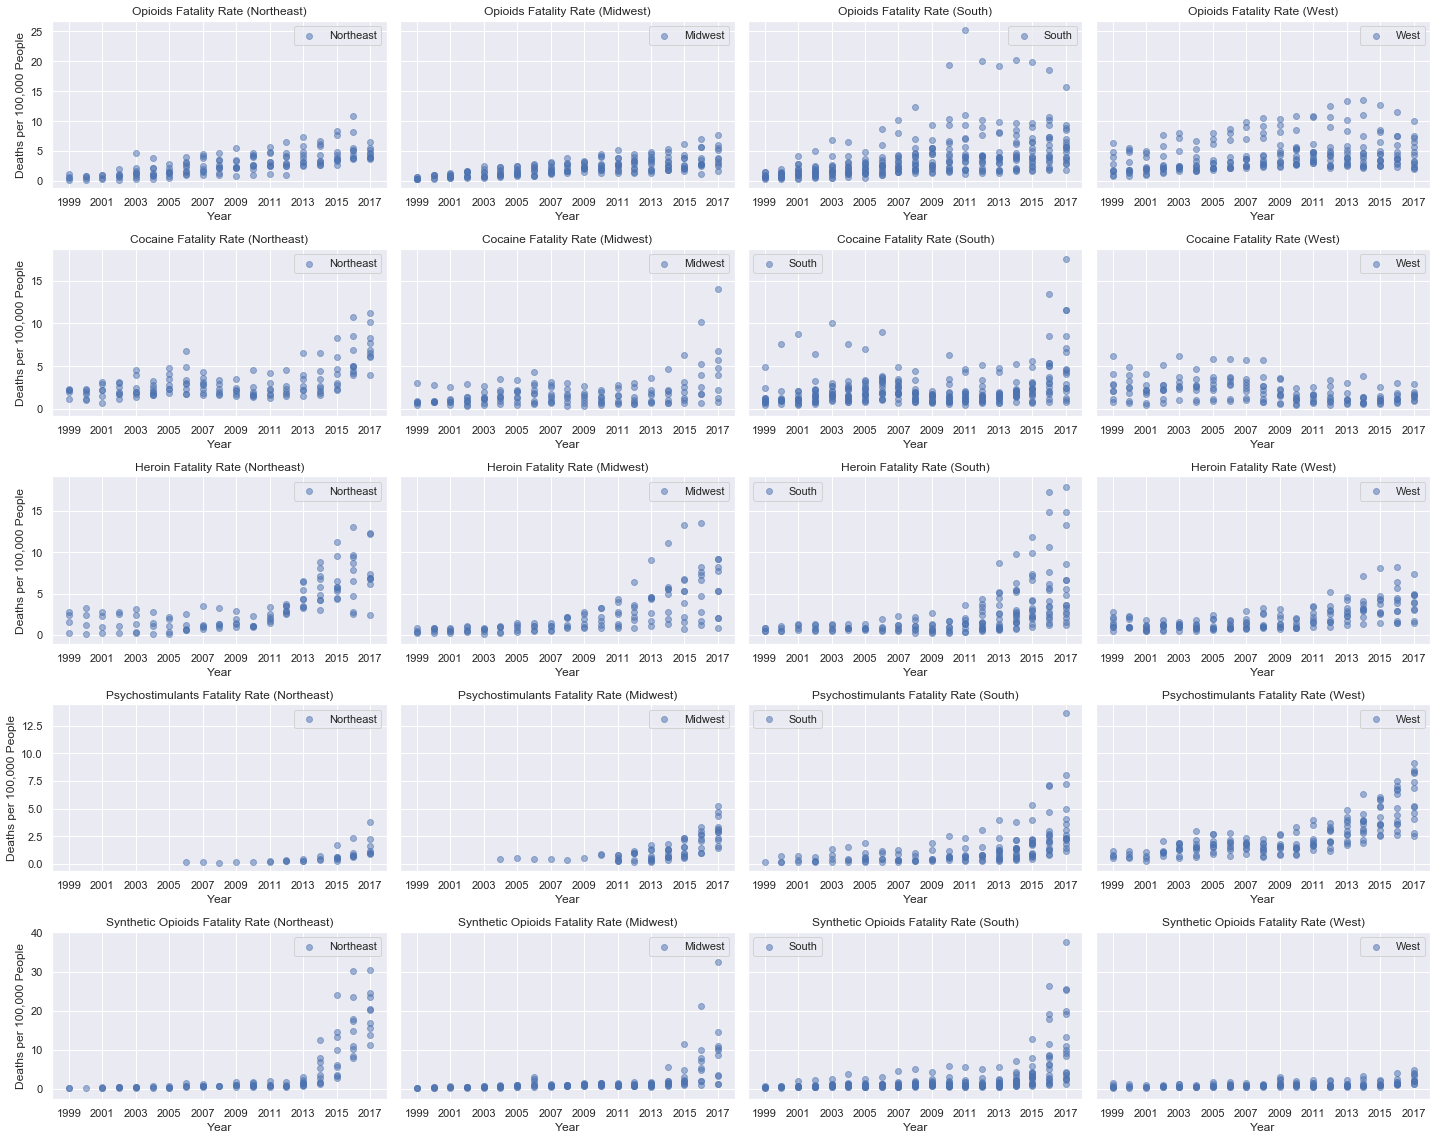

In [10]:
sns.set() # Uses Seaborn for better visualization
# Plots the fatality rate of each type of drug for each point in time for the states in each region
# Creates a subplot grid where each column is region of the US (Northeast, Midwest, South, and West)
# and each row is a different type of drug (Opioids, Cocaine, Heroin, Psychostimulants, and Synthetic Opioids)
fig5, ax = plt.subplots(5,4, figsize = (20,16),sharey = 'row') # Shares y-axis across rows to allow better comparison
# Row 1: Opioids
# Col 1: Northeast
ax[0,0].scatter(NEOpioids['TimeFrame'],NEOpioids['Data'], alpha = 0.5, label = 'Northeast')
ax[0,0].set_xlim(1998,2018) # Enables a well-spaced axis
ax[0,0].set_xticks(np.arange(min(NEOpioids['TimeFrame']), max(NEOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,0].legend()
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Deaths per 100,000 People")
ax[0,0].set_title("Opioids Fatality Rate (Northeast)")
# Col 2: Midwest
ax[0,1].scatter(MWOpioids['TimeFrame'],MWOpioids['Data'], alpha = 0.5, label = 'Midwest')
ax[0,1].set_xlim(1998,2018) # Enables a well-spaced axis
ax[0,1].set_xticks(np.arange(min(MWOpioids['TimeFrame']), max(MWOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,1].legend()
ax[0,1].set_xlabel("Year")
ax[0,1].set_title("Opioids Fatality Rate (Midwest)")
# Col 3: South
ax[0,2].scatter(STOpioids['TimeFrame'],STOpioids['Data'], alpha = 0.5, label = 'South')
ax[0,2].set_xlim(1998,2018) # Enables a well-spaced axis
ax[0,2].set_xticks(np.arange(min(STOpioids['TimeFrame']), max(STOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,2].legend()
ax[0,2].set_xlabel("Year")
ax[0,2].set_title("Opioids Fatality Rate (South)")
# Col 4: West
ax[0,3].scatter(WTOpioids['TimeFrame'],WTOpioids['Data'], alpha = 0.5, label = 'West')
ax[0,3].set_xlim(1998,2018) # Enables a well-spaced axis
ax[0,3].set_xticks(np.arange(min(WTOpioids['TimeFrame']), max(WTOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,3].legend()
ax[0,3].set_xlabel("Year")
ax[0,3].set_title("Opioids Fatality Rate (West)")

# Row 2: Cocaine
# Col 1: Northeast
ax[1,0].scatter(NECocaine['TimeFrame'],NECocaine['Data'], alpha = 0.5, label = 'Northeast')
ax[1,0].set_xlim(1998,2018) # Enables a well-spaced axis
ax[1,0].set_xticks(np.arange(min(NECocaine['TimeFrame']), max(NECocaine['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,0].legend()
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Deaths per 100,000 People")
ax[1,0].set_title("Cocaine Fatality Rate (Northeast)")
# Col 2: Midwest
ax[1,1].scatter(MWCocaine['TimeFrame'],MWCocaine['Data'], alpha = 0.5, label = 'Midwest')
ax[1,1].set_xlim(1998,2018) # Enables a well-spaced axis
ax[1,1].set_xticks(np.arange(min(MWCocaine['TimeFrame']), max(MWCocaine['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,1].legend()
ax[1,1].set_xlabel("Year")
ax[1,1].set_title("Cocaine Fatality Rate (Midwest)")
# Col 3: South
ax[1,2].scatter(STCocaine['TimeFrame'],STCocaine['Data'], alpha = 0.5, label = 'South')
ax[1,2].set_xlim(1998,2018) # Enables a well-spaced axis
ax[1,2].set_xticks(np.arange(min(STCocaine['TimeFrame']), max(STCocaine['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,2].legend()
ax[1,2].set_xlabel("Year")
ax[1,2].set_title("Cocaine Fatality Rate (South)")
# Col 4: West
ax[1,3].scatter(WTCocaine['TimeFrame'],WTCocaine['Data'], alpha = 0.5, label = 'West')
ax[1,3].set_xlim(1998,2018) # Enables a well-spaced axis
ax[1,3].set_xticks(np.arange(min(WTCocaine['TimeFrame']), max(WTCocaine['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,3].legend()
ax[1,3].set_xlabel("Year")
ax[1,3].set_title("Cocaine Fatality Rate (West)")

# Row 3: Heroin
# Col 1: Northeast
ax[2,0].scatter(NEHeroin['TimeFrame'],NEHeroin['Data'], alpha = 0.5, label = 'Northeast')
ax[2,0].set_xlim(1998,2018) # Enables a well-spaced axis
ax[2,0].set_xticks(np.arange(min(NEHeroin['TimeFrame']), max(NEHeroin['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[2,0].legend()
ax[2,0].set_xlabel("Year")
ax[2,0].set_ylabel("Deaths per 100,000 People")
ax[2,0].set_title("Heroin Fatality Rate (Northeast)")
# Col 2: Midwest
ax[2,1].scatter(MWHeroin['TimeFrame'],MWHeroin['Data'], alpha = 0.5, label = 'Midwest')
ax[2,1].set_xlim(1998,2018) # Enables a well-spaced axis
ax[2,1].set_xticks(np.arange(min(MWHeroin['TimeFrame']), max(MWHeroin['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[2,1].legend()
ax[2,1].set_xlabel("Year")
ax[2,1].set_title("Heroin Fatality Rate (Midwest)")
# Col 3: South
ax[2,2].scatter(STHeroin['TimeFrame'],STHeroin['Data'], alpha = 0.5, label = 'South')
ax[2,2].set_xlim(1998,2018) # Enables a well-spaced axis
ax[2,2].set_xticks(np.arange(min(STHeroin['TimeFrame']), max(STHeroin['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[2,2].legend()
ax[2,2].set_xlabel("Year")
ax[2,2].set_title("Heroin Fatality Rate (South)")
# Col 4: West
ax[2,3].scatter(WTHeroin['TimeFrame'],WTHeroin['Data'], alpha = 0.5, label = 'West')
ax[2,3].set_xlim(1998,2018) # Enables a well-spaced axis
ax[2,3].set_xticks(np.arange(min(WTHeroin['TimeFrame']), max(WTHeroin['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[2,3].legend()
ax[2,3].set_xlabel("Year")
ax[2,3].set_title("Heroin Fatality Rate (West)")

# Row 4: Psychostimulants
# Col 1: Northeast
ax[3,0].scatter(NEPsycho['TimeFrame'],NEPsycho['Data'], alpha = 0.5, label = 'Northeast')
ax[3,0].set_xlim(1998,2018) # Enables a well-spaced axis
ax[3,0].set_xticks(np.arange(min(NEPsycho['TimeFrame']), max(NEPsycho['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[3,0].legend()
ax[3,0].set_xlabel("Year")
ax[3,0].set_ylabel("Deaths per 100,000 People")
ax[3,0].set_title("Psychostimulants Fatality Rate (Northeast)")
# Col 2: Midwest
ax[3,1].scatter(MWPsycho['TimeFrame'],MWPsycho['Data'], alpha = 0.5, label = 'Midwest')
ax[3,1].set_xlim(1998,2018) # Enables a well-spaced axis
ax[3,1].set_xticks(np.arange(min(MWPsycho['TimeFrame']), max(MWPsycho['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[3,1].legend()
ax[3,1].set_xlabel("Year")
ax[3,1].set_title("Psychostimulants Fatality Rate (Midwest)")
# Col 3: South
ax[3,2].scatter(STPsycho['TimeFrame'],STPsycho['Data'], alpha = 0.5, label = 'South')
ax[3,2].set_xlim(1998,2018) # Enables a well-spaced axis
ax[3,2].set_xticks(np.arange(min(STPsycho['TimeFrame']), max(STPsycho['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[3,2].legend()
ax[3,2].set_xlabel("Year")
ax[3,2].set_title("Psychostimulants Fatality Rate (South)")
# Col 4: West
ax[3,3].scatter(WTPsycho['TimeFrame'],WTPsycho['Data'], alpha = 0.5, label = 'West')
ax[3,3].set_xlim(1998,2018) # Enables a well-spaced axis
ax[3,3].set_xticks(np.arange(min(WTPsycho['TimeFrame']), max(WTPsycho['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[3,3].legend()
ax[3,3].set_xlabel("Year")
ax[3,3].set_title("Psychostimulants Fatality Rate (West)")

#Row 5: Synthetic Opioids
# Col 1: Northeast
ax[4,0].scatter(NESynOpioids['TimeFrame'],NESynOpioids['Data'], alpha = 0.5, label = 'Northeast')
ax[4,0].set_xlim(1998,2018) # Enables a well-spaced axis
ax[4,0].set_xticks(np.arange(min(NESynOpioids['TimeFrame']), max(NESynOpioids['TimeFrame'])+1, 2.0)) # Enables nice x-ticks
ax[4,0].legend()
ax[4,0].set_xlabel("Year")
ax[4,0].set_ylabel("Deaths per 100,000 People")
ax[4,0].set_title("Synthetic Opioids Fatality Rate (Northeast)")
# Col 2: Midwest
ax[4,1].scatter(MWSynOpioids['TimeFrame'],MWSynOpioids['Data'], alpha = 0.5, label = 'Midwest')
ax[4,1].set_xlim(1998,2018) # Enables a well-spaced axis
ax[4,1].set_xticks(np.arange(min(MWSynOpioids['TimeFrame']), max(MWSynOpioids['TimeFrame'])+1, 2.0)) # Enables nice x-ticks
ax[4,1].legend()
ax[4,1].set_xlabel("Year")
ax[4,1].set_title("Synthetic Opioids Fatality Rate (Midwest)")
# Col 3: South
ax[4,2].scatter(STSynOpioids['TimeFrame'],STSynOpioids['Data'], alpha = 0.5, label = 'South')
ax[4,2].set_xlim(1998,2018) # Enables a well-spaced axis
ax[4,2].set_xticks(np.arange(min(STSynOpioids['TimeFrame']), max(STSynOpioids['TimeFrame'])+1, 2.0)) # Enables nice x-ticks
ax[4,2].legend()
ax[4,2].set_xlabel("Year")
ax[4,2].set_title("Synthetic Opioids Fatality Rate (South)")
# Col 4: West
ax[4,3].scatter(WTSynOpioids['TimeFrame'],WTSynOpioids['Data'], alpha = 0.5, label = 'West')
ax[4,3].set_xlim(1998,2018) # Enables a well-spaced axis
ax[4,3].set_xticks(np.arange(min(WTSynOpioids['TimeFrame']), max(WTSynOpioids['TimeFrame'])+1, 2.0)) # Enables nice x-ticks
ax[4,3].legend()
ax[4,3].set_xlabel("Year")
ax[4,3].set_title("Synthetic Opioids Fatality Rate (West)")

plt.tight_layout() # Aligns subplots nicely

In [11]:
# Since the previous plot plotted individual state's values in each region for different years,
# it is necessary to take the mean of the data for each region for each year to get continuous lines.
time = np.arange(1999,2018,1) # creates a time list for plotting
# Blank lists to store the mean values
NE_Opioid_Data = []
MW_Opioid_Data = []
ST_Opioid_Data = []
WT_Opioid_Data = []

NE_Cocaine_Data = []
MW_Cocaine_Data = []
ST_Cocaine_Data = []
WT_Cocaine_Data = []

NE_Heroin_Data = []
MW_Heroin_Data = []
ST_Heroin_Data = []
WT_Heroin_Data = []

NE_Psycho_Data = []
MW_Psycho_Data = []
ST_Psycho_Data = []
WT_Psycho_Data = []

NE_SynOp_Data = []
MW_SynOp_Data = []
ST_SynOp_Data = []
WT_SynOp_Data = []

# Iterates over the time and take the mean of each drug data and append to respective list. 
for i in time:
    neO = np.mean(NEOpioids[NEOpioids['TimeFrame'] == i]['Data'])
    mwO = np.mean(MWOpioids[MWOpioids['TimeFrame'] == i]['Data'])
    stO = np.mean(STOpioids[STOpioids['TimeFrame'] == i]['Data'])
    wtO = np.mean(WTOpioids[WTOpioids['TimeFrame'] == i]['Data'])
    NE_Opioid_Data.append(neO)
    MW_Opioid_Data.append(mwO)
    ST_Opioid_Data.append(stO)
    WT_Opioid_Data.append(wtO)
    
    neC = np.mean(NECocaine[NECocaine['TimeFrame'] == i]['Data'])
    mwC = np.mean(MWCocaine[MWCocaine['TimeFrame'] == i]['Data'])
    stC = np.mean(STCocaine[STCocaine['TimeFrame'] == i]['Data'])
    wtC = np.mean(WTCocaine[WTCocaine['TimeFrame'] == i]['Data'])
    NE_Cocaine_Data.append(neC)
    MW_Cocaine_Data.append(mwC)
    ST_Cocaine_Data.append(stC)
    WT_Cocaine_Data.append(wtC)
    
    neH = np.mean(NEHeroin[NEHeroin['TimeFrame'] == i]['Data'])
    mwH = np.mean(MWHeroin[MWHeroin['TimeFrame'] == i]['Data'])
    stH = np.mean(STHeroin[STHeroin['TimeFrame'] == i]['Data'])
    wtH = np.mean(WTHeroin[WTHeroin['TimeFrame'] == i]['Data'])
    NE_Heroin_Data.append(neH)
    MW_Heroin_Data.append(mwH)
    ST_Heroin_Data.append(stH)
    WT_Heroin_Data.append(wtH)
    
    neP = np.mean(NEPsycho[NEPsycho['TimeFrame'] == i]['Data'])
    mwP = np.mean(MWPsycho[MWPsycho['TimeFrame'] == i]['Data'])
    stP = np.mean(STPsycho[STPsycho['TimeFrame'] == i]['Data'])
    wtP = np.mean(WTPsycho[WTPsycho['TimeFrame'] == i]['Data'])
    NE_Psycho_Data.append(neP)
    MW_Psycho_Data.append(mwP)
    ST_Psycho_Data.append(stP)
    WT_Psycho_Data.append(wtP)
    
    neS = np.mean(NESynOpioids[NESynOpioids['TimeFrame'] == i]['Data'])
    mwS = np.mean(MWSynOpioids[MWSynOpioids['TimeFrame'] == i]['Data'])
    stS = np.mean(STSynOpioids[STSynOpioids['TimeFrame'] == i]['Data'])
    wtS = np.mean(WTSynOpioids[WTSynOpioids['TimeFrame'] == i]['Data'])
    NE_SynOp_Data.append(neS)
    MW_SynOp_Data.append(mwS)
    ST_SynOp_Data.append(stS)
    WT_SynOp_Data.append(wtS)

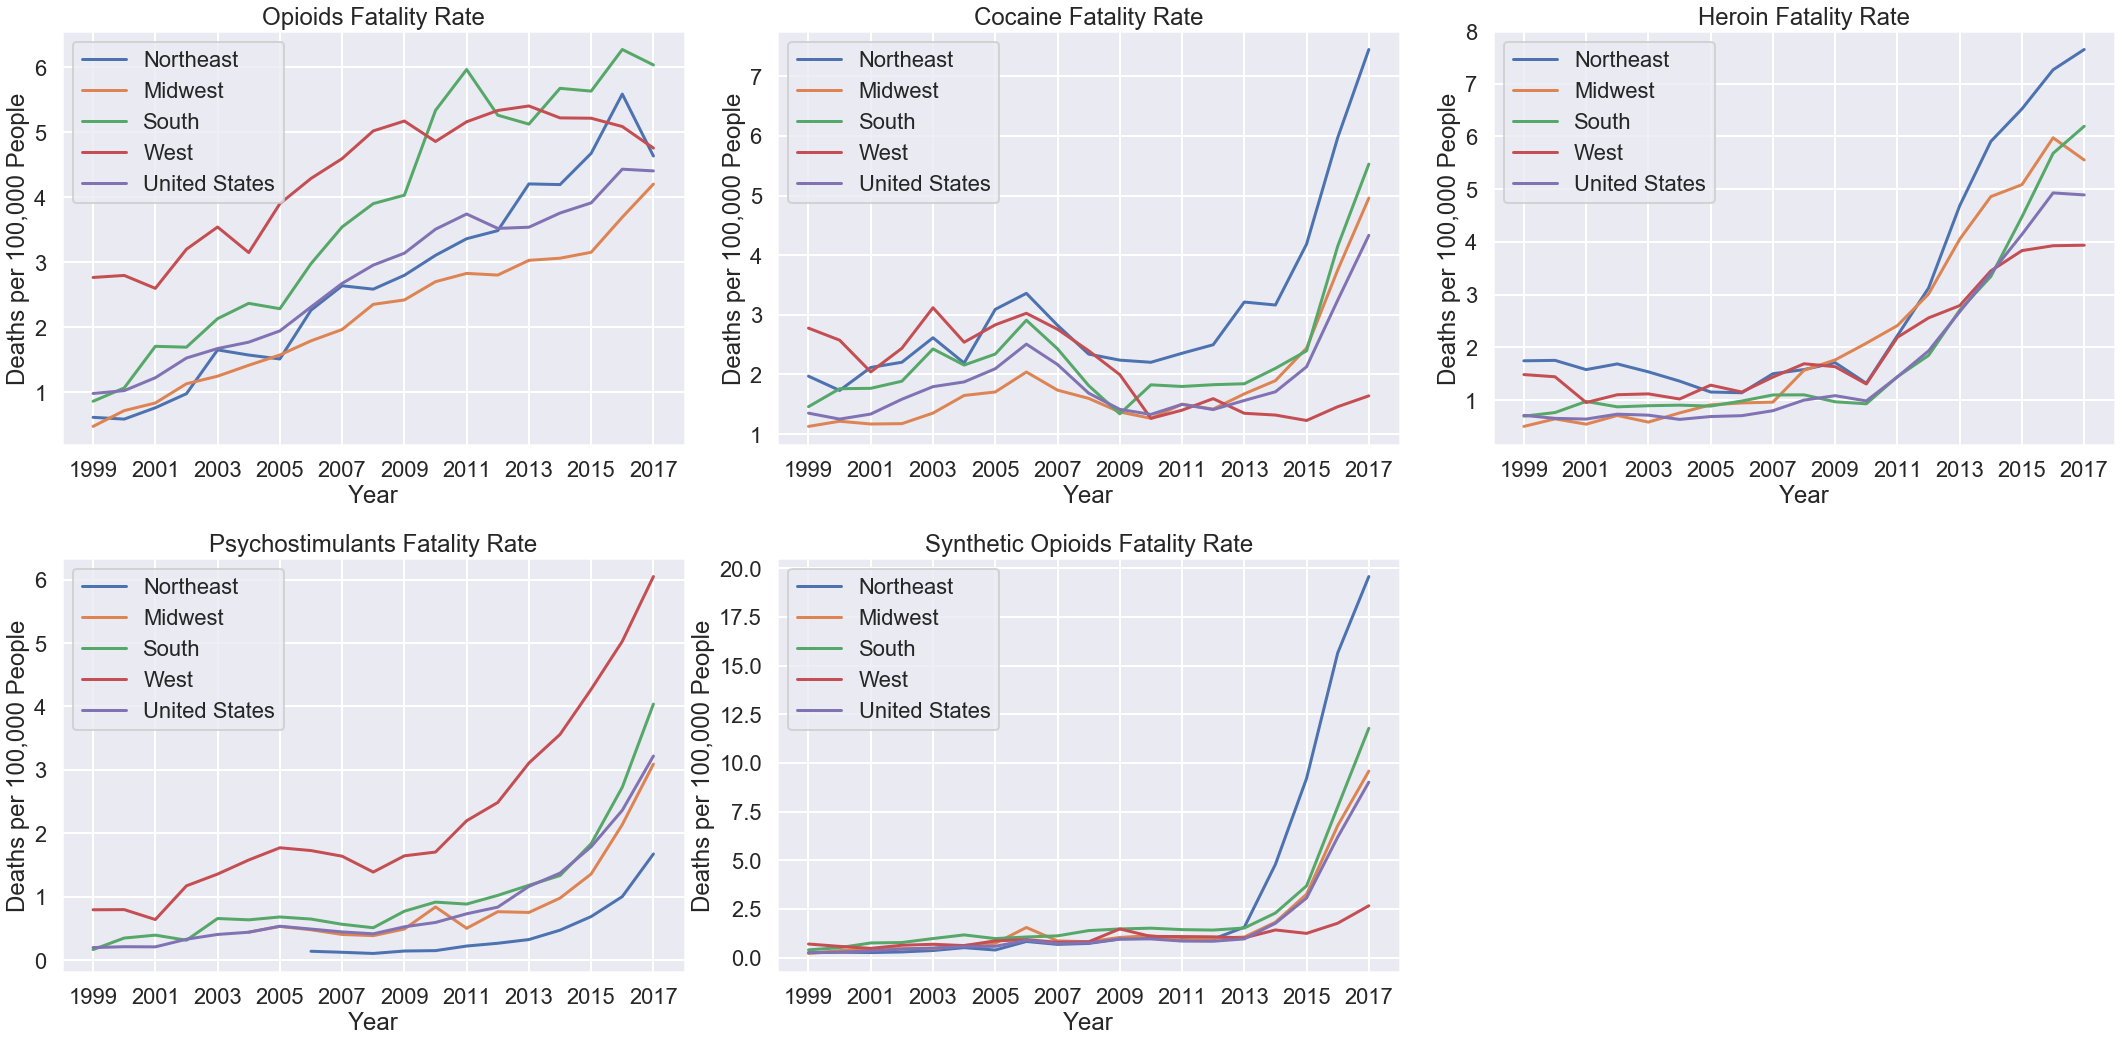

In [12]:
sns.set(context = 'poster') # 'poster' makes the lines more visible and the colors more differentiable
fig6 = plt.figure(figsize = (30,15))
# Use this method of adding subplots to avoid having an empty plot at [1,2]
axis1 = fig6.add_subplot(231)
axis2 = fig6.add_subplot(232)
axis3 = fig6.add_subplot(233)
axis4 = fig6.add_subplot(234)
axis5 = fig6.add_subplot(235)
# PLots opioids' fatality rate over time for each region in US
axis1.plot(time, NE_Opioid_Data, label = 'Northeast')
axis1.plot(time, MW_Opioid_Data, label = 'Midwest')
axis1.plot(time, ST_Opioid_Data, label = 'South')
axis1.plot(time, WT_Opioid_Data, label = 'West')
axis1.plot(USOpioids['TimeFrame'], USOpioids['Data'], label = 'United States')
axis1.set_xlim(1998,2018) # Enables a well-spaced axis
axis1.set_xticks(np.arange(min(USOpioids['TimeFrame']), max(USOpioids['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis1.legend()
axis1.set_xlabel("Year")
axis1.set_ylabel("Deaths per 100,000 People")
axis1.set_title("Opioids Fatality Rate")
# PLots cocaine's fatality rate over time for each region in US
axis2.plot(time, NE_Cocaine_Data, label = 'Northeast')
axis2.plot(time, MW_Cocaine_Data, label = 'Midwest')
axis2.plot(time, ST_Cocaine_Data, label = 'South')
axis2.plot(time, WT_Cocaine_Data, label = 'West')
axis2.plot(USCocaine['TimeFrame'], USCocaine['Data'], label = 'United States')
axis2.set_xlim(1998,2018) # Enables a well-spaced axis
axis2.set_xticks(np.arange(min(USCocaine['TimeFrame']), max(USCocaine['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis2.legend()
axis2.set_xlabel("Year")
axis2.set_ylabel("Deaths per 100,000 People")
axis2.set_title("Cocaine Fatality Rate")
# PLots heroin's fatality rate over time for each region in US
axis3.plot(time, NE_Heroin_Data, label = 'Northeast')
axis3.plot(time, MW_Heroin_Data, label = 'Midwest')
axis3.plot(time, ST_Heroin_Data, label = 'South')
axis3.plot(time, WT_Heroin_Data, label = 'West')
axis3.plot(USHeroin['TimeFrame'], USHeroin['Data'], label = 'United States')
axis3.set_xlim(1998,2018) # Enables a well-spaced axis
axis3.set_xticks(np.arange(min(USHeroin['TimeFrame']), max(USHeroin['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis3.legend()
axis3.set_xlabel("Year")
axis3.set_ylabel("Deaths per 100,000 People")
axis3.set_title("Heroin Fatality Rate")
# PLots psychostimulants' fatality rate over time for each region in US
axis4.plot(time, NE_Psycho_Data, label = 'Northeast')
axis4.plot(time, MW_Psycho_Data, label = 'Midwest')
axis4.plot(time, ST_Psycho_Data, label = 'South')
axis4.plot(time, WT_Psycho_Data, label = 'West')
axis4.plot(USPsycho['TimeFrame'], USPsycho['Data'], label = 'United States')
axis4.set_xlim(1998,2018) # Enables a well-spaced axis
axis4.set_xticks(np.arange(min(USPsycho['TimeFrame']), max(USPsycho['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis4.legend()
axis4.set_xlabel("Year")
axis4.set_ylabel("Deaths per 100,000 People")
axis4.set_title("Psychostimulants Fatality Rate")
# PLots synthetic opioids' fatality rate over time for each region in US
axis5.plot(time, NE_SynOp_Data, label = 'Northeast')
axis5.plot(time, MW_SynOp_Data, label = 'Midwest')
axis5.plot(time, ST_SynOp_Data, label = 'South')
axis5.plot(time, WT_SynOp_Data, label = 'West')
axis5.plot(USSynOpioids['TimeFrame'], USSynOpioids['Data'], label = 'United States')
axis5.set_xlim(1998,2018) # Enables a well-spaced axis
axis5.set_xticks(np.arange(min(USSynOpioids['TimeFrame']), max(USSynOpioids['TimeFrame'])+1, 2.0)) # Enables nice x-ticks
axis5.legend()
axis5.set_xlabel("Year")
axis5.set_ylabel("Deaths per 100,000 People")
axis5.set_title("Synthetic Opioids Fatality Rate")

plt.tight_layout() # Aligns subplots nicely

#### Drug Sales
___
The next part will be visualizing drug sales of hydrocodone and oxycodone over time for Michigan, the US, and the four regions of the US (Northeast, Midwest, South, and West). The data is measured in annual kilograms sold of oxycodone and hydrocodone per 100,000 people.

Source: [Prescription opioid painkiller sales in kilograms per 100,000 people, oxycodone and hydrocodone](http://statehealthcompare.shadac.org/map/170/prescription-opioid-painkiller-sales-in-kilograms-per-100000-people-by-oxycodone-and-hydrocodone#87/24/204)

Original Source: U.S. Drug Enforcement Agency's Automated Reports and Consolidated Ordering System (ARCOS) Retail Drug Summary Reports

In [13]:
# Read in the .csv data and skip the first 6 rows of text. Initially read in everything as 'str'.
drugsales = pd.read_csv('./data/Prescription opioid painkiller sales in kilograms per 100,000 people by oxycodone and hydrocodone.csv',
                        skiprows = 6, dtype = 'str')
# Change the data type of some of the columns so that it will be easier to work with
drugsales = drugsales.astype({"TimeFrame": 'int',"Data": 'float',"MOE":'float'})
drugsales.head() # get a quick view of how the data looks

,Fips,Location,Oxycodone / Hydrocodone,TimeFrame,Data Type,Data,MOE
0,US,United States,Oxycodone,2000,"Rate per 100,000",5.51069,NaN
1,US,United States,Oxycodone,2001,"Rate per 100,000",7.17455,NaN
2,US,United States,Oxycodone,2002,"Rate per 100,000",8.05633,NaN
3,US,United States,Oxycodone,2003,"Rate per 100,000",9.59663,NaN
4,US,United States,Oxycodone,2004,"Rate per 100,000",10.50476,NaN


In [14]:
# Masks out the type of drug (hydrocodone or oxycodone)
oxyMask = drugsales['Oxycodone / Hydrocodone'] == 'Oxycodone'
hydMask = drugsales['Oxycodone / Hydrocodone'] == 'Hydrocodone'
# Masks out the specific year of the data (2000 is the oldest data and 2017 is the newest)
y00MaskS = drugsales['TimeFrame'] == 2000
y17MaskS = drugsales['TimeFrame'] == 2017
# Masks out the specific location (Michigan, US)
MichMask = drugsales['Location'] == 'Michigan'
USMask = drugsales['Location'] == 'United States'
# Masks out the specific locaiton by region (Northeast, Midwest, South, and West)
NEmask = drugsales['Location'].isin(Northeast)
MWmask = drugsales['Location'].isin(Midwest)
STmask = drugsales['Location'].isin(South)
WTmask = drugsales['Location'].isin(West)

In [15]:
# Combines drug type mask and region mask
# Oxycodone in each region
NEOxySales = drugsales[NEmask & oxyMask]
MWOxySales = drugsales[MWmask & oxyMask]
STOxySales = drugsales[STmask & oxyMask]
WTOxySales = drugsales[WTmask & oxyMask]
# Hydrocodone in each region
NEHydSales = drugsales[NEmask & hydMask]
MWHydSales = drugsales[MWmask & hydMask]
STHydSales = drugsales[STmask & hydMask]
WTHydSales = drugsales[WTmask & hydMask]
# Combines drug type and location mask to get each type of drug at each location (US or Michigan)
MichOxySales = drugsales[MichMask & oxyMask]
MichHydSales = drugsales[MichMask & hydMask]
USOxySales = drugsales[USMask & oxyMask]
USHydSales = drugsales[USMask & hydMask]
# Combines year mask and drug mask to get each type of drug in 2000 and in 2017
OxySales00 = drugsales[oxyMask & y00MaskS]
HydSales00 = drugsales[hydMask & y00MaskS]
OxySales17 = drugsales[oxyMask & y17MaskS]
HydSales17 = drugsales[hydMask & y17MaskS]

Text(0.5, 1.0, 'Oxycodone Sales (2000)')

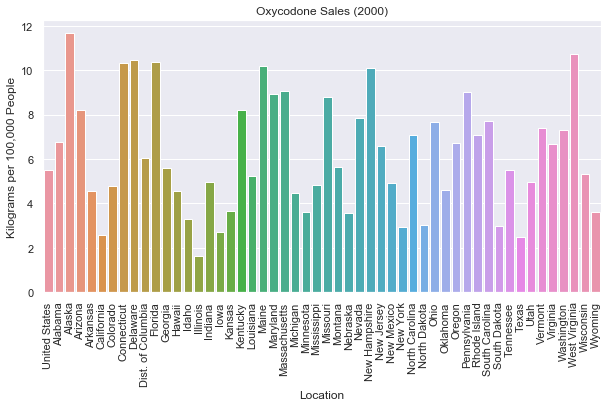

In [16]:
# Make a bar graph of each state's opioid sales in 2000.
sns.set() # Uses Seaborn for better visualization
fig11 = plt.figure(figsize = (10,5)) # Names figure and sets figure size
ax = sns.barplot(x = OxySales00['Location'], y = OxySales00['Data'], orient = 'v') # Makes a bar plot with nice color spectrum 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 'vertical') # Makes the labels easier to read by rotating them 90 deg
ax.set_ylabel("Kilograms per 100,000 People")
ax.set_title("Oxycodone Sales (2000)")

Text(0.5, 1.0, 'Oxycodone Sales (2017)')

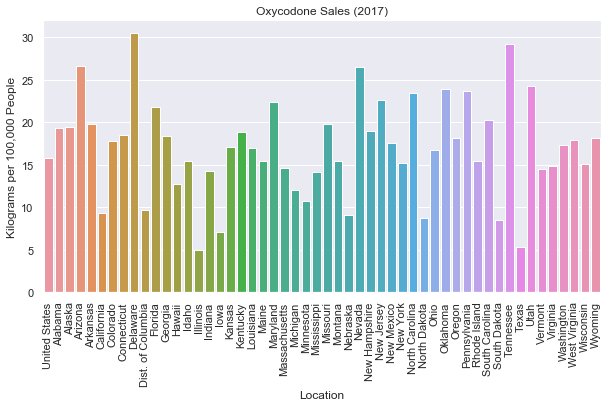

In [17]:
sns.set() # Uses Seaborn for better visualization
fig12 = plt.figure(figsize = (10,5)) # Names figure and sets figure size
ax = sns.barplot(x = OxySales17['Location'], y = OxySales17['Data'], orient = 'v') # Makes a bar plot with nice color spectrum 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 'vertical') # Makes the labels easier to read by rotating them 90 deg
ax.set_ylabel("Kilograms per 100,000 People") 
ax.set_title("Oxycodone Sales (2017)")

In [18]:
# FInds the % increase from 2000 to 2017 for Michigan and the US
M00_oxyS = OxySales00[OxySales00['Location'] == 'Michigan'].iloc[0]['Data']
US00_oxyS = OxySales00[OxySales00['Location'] == 'United States'].iloc[0]['Data']
M17_oxyS = OxySales17[OxySales17['Location'] == 'Michigan'].iloc[0]['Data']
US17_oxyS = OxySales17[OxySales17['Location'] == 'United States'].iloc[0]['Data']
print('In 2000, oxycodone sales in Michigan was {} kilograms per 100,000 people.'.format(M00_oxyS))
print('In 2017, oxycodone sales in Michigan was {} kilograms per 100,000 people.'.format(M17_oxyS))
print('In 2000, oxycodone sales in the US was {} kilograms per 100,000 people.'.format(US00_oxyS))
print('In 2017, oxycodone sales in the US was {} kilograms per 100,000 people.'.format(US17_oxyS))
print('From 1999 to 2017, oxycodone sales have gone up {}% in Michigan.'.format(np.round((M17_oxyS-M00_oxyS)/M00_oxyS*100,2)))
print('From 1999 to 2017, oxycodone sales have gone up {}% in the US.'.format(np.round((US17_oxyS-US00_oxyS)/US00_oxyS*100,2)))

In 2000, oxycodone sales in Michigan was 4.44692 kilograms per 100,000 people.
In 2017, oxycodone sales in Michigan was 12.02877 kilograms per 100,000 people.
In 2000, oxycodone sales in the US was 5.51069 kilograms per 100,000 people.
In 2017, oxycodone sales in the US was 15.77549 kilograms per 100,000 people.
From 1999 to 2017, oxycodone sales have gone up 170.5% in Michigan.
From 1999 to 2017, oxycodone sales have gone up 186.27% in the US.


Text(0.5, 1.0, 'Hydrocodone Sales (2000)')

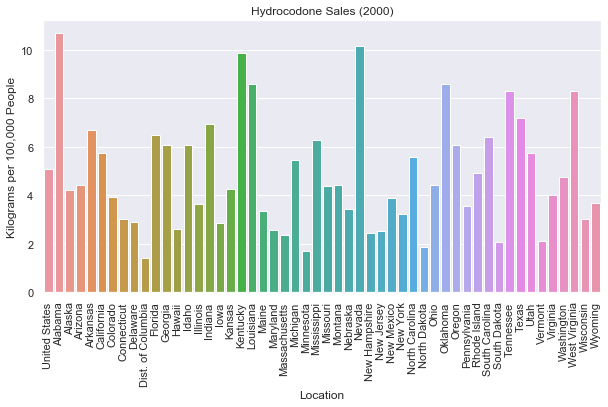

In [19]:
sns.set() # Uses Seaborn for better visualization
fig13 = plt.figure(figsize = (10,5)) # Names figure and sets figure size
ax = sns.barplot(x = HydSales00['Location'], y = HydSales00['Data'], orient = 'v') # Makes a bar plot with nice color spectrum 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 'vertical') # Makes the labels easier to read by rotating them 90 deg
ax.set_ylabel("Kilograms per 100,000 People")
ax.set_title("Hydrocodone Sales (2000)")

Text(0.5, 1.0, 'Hydrocodone Sales (2017)')

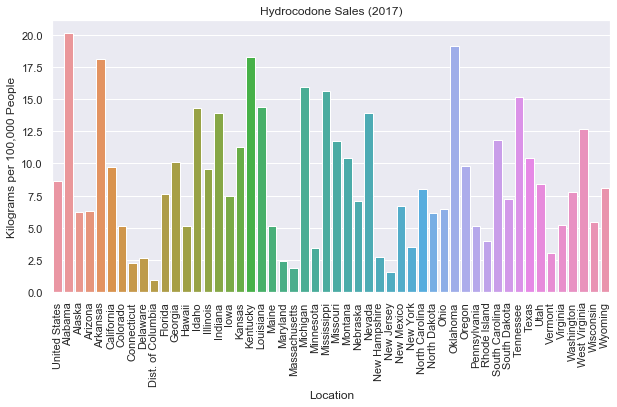

In [20]:
sns.set() # Uses Seaborn for better visualization
fig14 = plt.figure(figsize = (10,5)) # Names figure and sets figure size
ax = sns.barplot(x = HydSales17['Location'], y = HydSales17['Data'], orient = 'v') # Makes a bar plot with nice color spectrum 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 'vertical') # Makes the labels easier to read by rotating them 90 deg
ax.set_ylabel("Kilograms per 100,000 People")
ax.set_title("Hydrocodone Sales (2017)")

In [21]:
# FInds the % increase from 2000 to 2017 for Michigan and the US
M00_hydS = HydSales00[HydSales00['Location'] == 'Michigan'].iloc[0]['Data']
US00_hydS = HydSales00[HydSales00['Location'] == 'United States'].iloc[0]['Data']
M17_hydS = HydSales17[HydSales17['Location'] == 'Michigan'].iloc[0]['Data']
US17_hydS = HydSales17[HydSales17['Location'] == 'United States'].iloc[0]['Data']
print('In 2000, hydrocodone sales in Michigan was {} kilograms per 100,000 people.'.format(M00_hydS))
print('In 2017, hydrocodone sales in Michigan was {} kilograms per 100,000 people.'.format(M17_hydS))
print('In 2000, hydrocodone sales in the US was {} kilograms per 100,000 people.'.format(US00_hydS))
print('In 2017, hydrocodone sales in the US was {} kilograms per 100,000 people.'.format(US17_hydS))
print('From 1999 to 2017, hydrocodone sales have gone up {}% in Michigan.'.format(np.round((M17_hydS-M00_hydS)/M00_hydS*100,2)))
print('From 1999 to 2017, hydrocodone sales have gone up {}% in the US.'.format(np.round((US17_hydS-US00_hydS)/US00_hydS*100,2)))

In 2000, hydrocodone sales in Michigan was 5.47137 kilograms per 100,000 people.
In 2017, hydrocodone sales in Michigan was 15.96582 kilograms per 100,000 people.
In 2000, hydrocodone sales in the US was 5.08323 kilograms per 100,000 people.
In 2017, hydrocodone sales in the US was 8.6105 kilograms per 100,000 people.
From 1999 to 2017, hydrocodone sales have gone up 191.81% in Michigan.
From 1999 to 2017, hydrocodone sales have gone up 69.39% in the US.


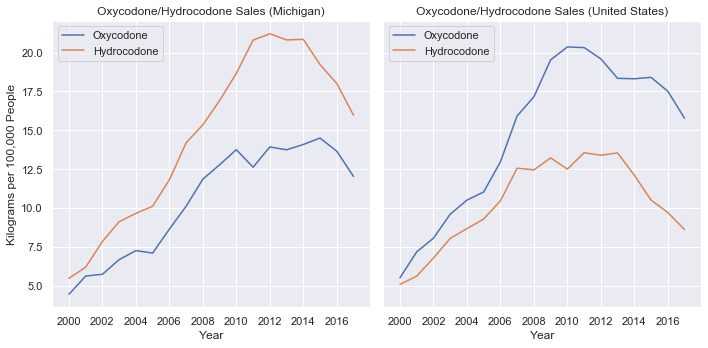

In [22]:
sns.set() # Uses Seaborn for better visualization
# Plots the sales of hydrocodone and oxycodone over time for Michigan and US
fig15, ax = plt.subplots(1,2, figsize = (10,5),sharey = True) # Shares y-axis to allow better comparison between subplots
# Plots hydrocodone and oxycodone sales over time for Michigan
ax[0].plot(MichOxySales['TimeFrame'], MichOxySales['Data'], label = 'Oxycodone')
ax[0].plot(MichHydSales['TimeFrame'], MichHydSales['Data'], label = 'Hydrocodone')
ax[0].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[0].set_xticks(np.arange(min(MichOxySales['TimeFrame']), max(MichOxySales['TimeFrame'])+1, 2.0)) #Enables nice-looking x-ticks
ax[0].legend()
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Kilograms per 100,000 People")
ax[0].set_title("Oxycodone/Hydrocodone Sales (Michigan)")
# Plots hydrocodone and oxycodone sales over time for US
ax[1].plot(USOxySales['TimeFrame'], USOxySales['Data'], label = 'Oxycodone')
ax[1].plot(USHydSales['TimeFrame'], USHydSales['Data'], label = 'Hydrocodone')
ax[1].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[1].set_xticks(np.arange(min(USOxySales['TimeFrame']), max(USOxySales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1].legend()
ax[1].set_xlabel("Year")
ax[1].set_title("Oxycodone/Hydrocodone Sales (United States)")
plt.tight_layout() # Aligns subplots nicely

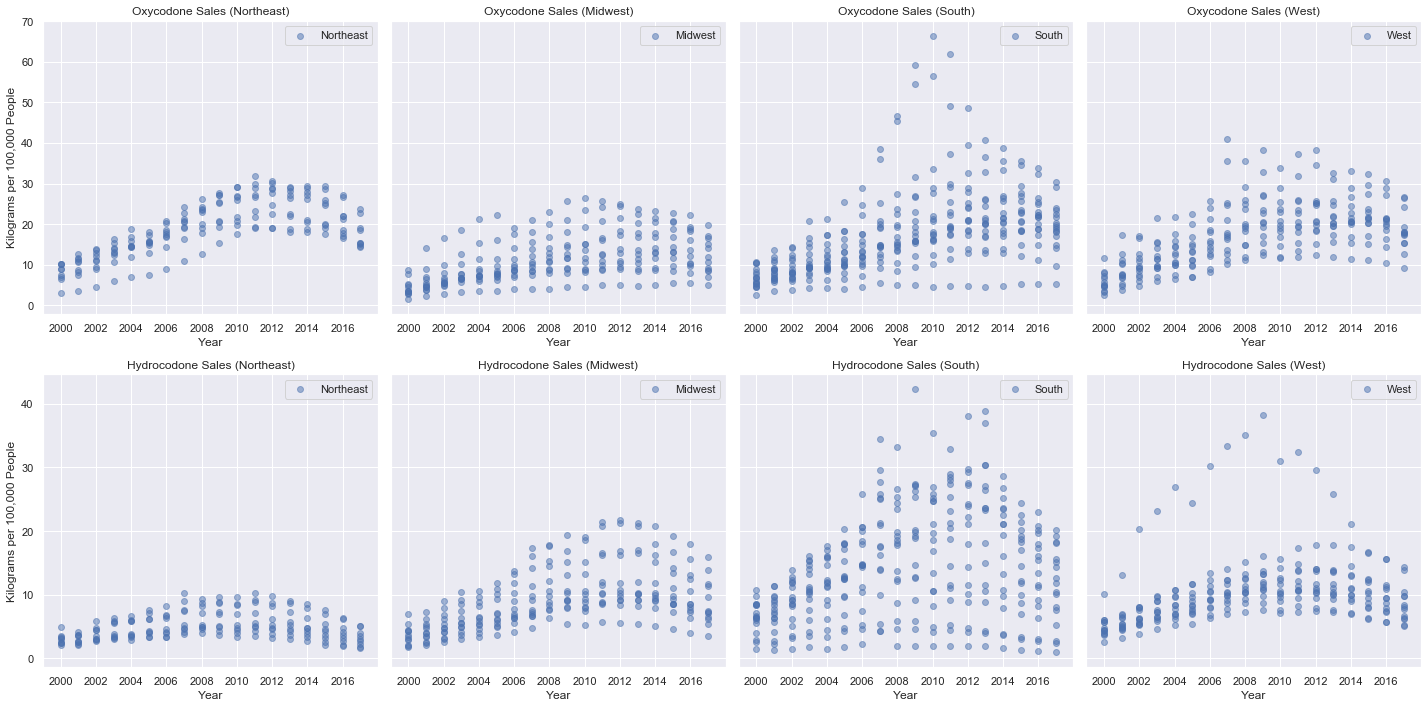

In [23]:
sns.set() # Uses Seaborn for better visualization
# Plots the sales of each type of drug for each point in time for the states in each region.
# Creates a subplot grid where each column is region of the US (Northeast, Midwest, South, and West)
# and each row is a type of drug (Oxycodone, and Hydrocodone)
fig16, ax = plt.subplots(2,4, figsize = (20,10),sharey = 'row') # Shares y-axis across rows to enable a better comparison
# Row 1: Oxycodone Sales
# Col 1: Northeast
ax[0,0].scatter(NEOxySales['TimeFrame'],NEOxySales['Data'], alpha = 0.5, label = 'Northeast')
ax[0,0].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[0,0].set_xticks(np.arange(min(NEOxySales['TimeFrame']), max(NEOxySales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,0].legend()
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Kilograms per 100,000 People")
ax[0,0].set_title("Oxycodone Sales (Northeast)")
# Col 2: Midwest
ax[0,1].scatter(MWOxySales['TimeFrame'],MWOxySales['Data'], alpha = 0.5, label = 'Midwest')
ax[0,1].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[0,1].set_xticks(np.arange(min(MWOxySales['TimeFrame']), max(MWOxySales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,1].legend()
ax[0,1].set_xlabel("Year")
ax[0,1].set_title("Oxycodone Sales (Midwest)")
# Col 3: South
ax[0,2].scatter(STOxySales['TimeFrame'],STOxySales['Data'], alpha = 0.5, label = 'South')
ax[0,2].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[0,2].set_xticks(np.arange(min(STOxySales['TimeFrame']), max(STOxySales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,2].legend()
ax[0,2].set_xlabel("Year")
ax[0,2].set_title("Oxycodone Sales (South)")
# Col 4: West
ax[0,3].scatter(WTOxySales['TimeFrame'],WTOxySales['Data'], alpha = 0.5, label = 'West')
ax[0,3].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[0,3].set_xticks(np.arange(min(WTOxySales['TimeFrame']), max(WTOxySales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[0,3].legend()
ax[0,3].set_xlabel("Year")
ax[0,3].set_title("Oxycodone Sales (West)")

#Row 2: Hydrocodone Sales
# Col 1: Northeast
ax[1,0].scatter(NEHydSales['TimeFrame'],NEHydSales['Data'], alpha = 0.5, label = 'Northeast')
ax[1,0].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[1,0].set_xticks(np.arange(min(NEHydSales['TimeFrame']), max(NEHydSales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,0].legend()
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Kilograms per 100,000 People")
ax[1,0].set_title("Hydrocodone Sales (Northeast)")
# Col 2: Midwest
ax[1,1].scatter(MWHydSales['TimeFrame'],MWHydSales['Data'], alpha = 0.5, label = 'Midwest')
ax[1,1].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[1,1].set_xticks(np.arange(min(MWHydSales['TimeFrame']), max(MWHydSales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,1].legend()
ax[1,1].set_xlabel("Year")
ax[1,1].set_title("Hydrocodone Sales (Midwest)")
# Col 3: South
ax[1,2].scatter(STHydSales['TimeFrame'],STHydSales['Data'], alpha = 0.5, label = 'South')
ax[1,2].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[1,2].set_xticks(np.arange(min(STHydSales['TimeFrame']), max(STHydSales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,2].legend()
ax[1,2].set_xlabel("Year")
ax[1,2].set_title("Hydrocodone Sales (South)")
# Col 4: West
ax[1,3].scatter(WTHydSales['TimeFrame'],WTHydSales['Data'], alpha = 0.5, label = 'West')
ax[1,3].set_xlim(1999,2018) # Enables nicely spaced x-axis
ax[1,3].set_xticks(np.arange(min(WTHydSales['TimeFrame']), max(WTHydSales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
ax[1,3].legend()
ax[1,3].set_xlabel("Year")
ax[1,3].set_title("Hydrocodone Sales (West)")

plt.tight_layout() # Aligns subplots nicely

In [24]:
# Since the previous plot plotted individual state's values in each region for different years,
# it is necessary to take the mean of the data for each region for each year to get continuous lines.
time2 = np.arange(2000,2018,1) # Creates a time array for plotting later
# Creates empty lists to store the means of each's region at different time points
NE_Oxy_Data = []
MW_Oxy_Data = []
ST_Oxy_Data = []
WT_Oxy_Data = []

NE_Hyd_Data = []
MW_Hyd_Data = []
ST_Hyd_Data = []
WT_Hyd_Data = []

# Iterates over the time and take the mean of each drug data and append to respective list. 
for i in time2:
    neOx = np.mean(NEOxySales[NEOxySales['TimeFrame'] == i]['Data'])
    mwOx = np.mean(MWOxySales[MWOxySales['TimeFrame'] == i]['Data'])
    stOx = np.mean(STOxySales[STOxySales['TimeFrame'] == i]['Data'])
    wtOx = np.mean(WTOxySales[WTOxySales['TimeFrame'] == i]['Data'])
    NE_Oxy_Data.append(neOx)
    MW_Oxy_Data.append(mwOx)
    ST_Oxy_Data.append(stOx)
    WT_Oxy_Data.append(wtOx)
    
    neHy = np.mean(NEHydSales[NEHydSales['TimeFrame'] == i]['Data'])
    mwHy = np.mean(MWHydSales[MWHydSales['TimeFrame'] == i]['Data'])
    stHy = np.mean(STHydSales[STHydSales['TimeFrame'] == i]['Data'])
    wtHy = np.mean(WTHydSales[WTHydSales['TimeFrame'] == i]['Data'])
    NE_Hyd_Data.append(neHy)
    MW_Hyd_Data.append(mwHy)
    ST_Hyd_Data.append(stHy)
    WT_Hyd_Data.append(wtHy)

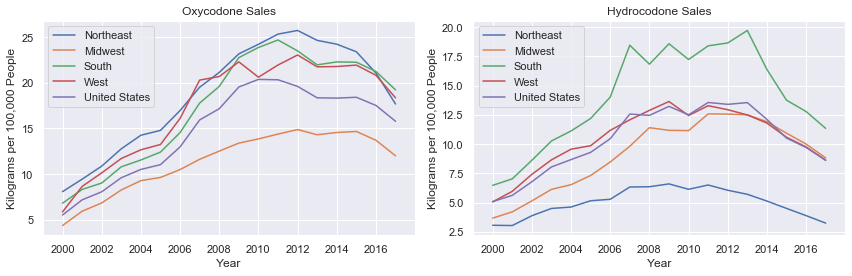

In [25]:
sns.set() # Uses Seaborn for better visualization
fig17 = plt.figure(figsize = (12,4))
axis1 = fig17.add_subplot(121)
axis2 = fig17.add_subplot(122)
# PLots oxycodone sales over time for each region in US
axis1.plot(time2, NE_Oxy_Data, label = 'Northeast')
axis1.plot(time2, MW_Oxy_Data, label = 'Midwest')
axis1.plot(time2, ST_Oxy_Data, label = 'South')
axis1.plot(time2, WT_Oxy_Data, label = 'West')
axis1.plot(USOxySales['TimeFrame'], USOxySales['Data'], label = 'United States')
axis1.set_xlim(1999,2018) # Enables nicely spaced x-axis
axis1.set_xticks(np.arange(min(USOxySales['TimeFrame']), max(USOxySales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis1.legend()
axis1.set_xlabel("Year")
axis1.set_ylabel("Kilograms per 100,000 People")
axis1.set_title("Oxycodone Sales")
# PLots hydrocodone sales over time for each region in US
axis2.plot(time2, NE_Hyd_Data, label = 'Northeast')
axis2.plot(time2, MW_Hyd_Data, label = 'Midwest')
axis2.plot(time2, ST_Hyd_Data, label = 'South')
axis2.plot(time2, WT_Hyd_Data, label = 'West')
axis2.plot(USHydSales['TimeFrame'], USHydSales['Data'], label = 'United States')
axis2.set_xlim(1999,2018) # Enables nicely spaced x-axis
axis2.set_xticks(np.arange(min(USHydSales['TimeFrame']), max(USHydSales['TimeFrame'])+1, 2.0)) # Enables nice-looking x-ticks
axis2.legend()
axis2.set_xlabel("Year")
axis2.set_ylabel("Kilograms per 100,000 People")
axis2.set_title("Hydrocodone Sales")
plt.tight_layout() # Aligns subplots nicely

### Oxycodone Metabolism
___
The next step is to figure out why presription opioid overdoses are so common by creating an odeint compartmental models of various complexity to visualize oxycodone's blood plasma levels and it's narrow therapeutic window.
The three levels of the model are:
* Simple first-order reaction of metabolism of oxycodone
* Include the CYP3A4 enzyme and the metabolism of ritonavir
* Include the competitive inhibition of the benzodiazepines

#### Simple Model
___
<img src="Onecompartment.jpg" width=350px>

This is a very simple model meant for orally consumed drugs. It will assume that the drug goes very quickly and directly to the intestine and does not enter the blood before being absorbed to the blood from the intestine. Oxycodone follows this assumption, so this is a good model to use. Additionally, it must be noted that the will ignore the complex path that the drug takes on its way to be eliminated from the blood. Notice that there are two compartments (Gut Dose and Blood Concentration) and two paramenters (K<sub>absorption</sub> and K<sub>elimination</sub>). For the purpose of the code, K<sub>absorption</sub> will referred to as ***A*** and K<sub>elimination</sub> will be referred to as ***E***. Gut Dose will be **g** and Blood Concentration will be **b**.

The ODE version of this, using the notation in the code below, is: $\frac{dg}{dt} = -Ag,$ $\frac{db}{dt} = Ag - Eb$

**Single Dose**

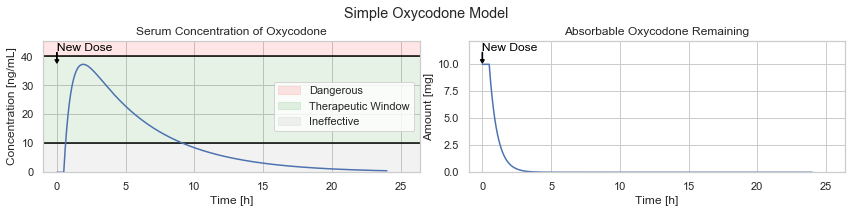

In [26]:
# Defined the derivative function for each compartment using the ODE's above
def simple_derivs(y, t, A, E, lag, V): 
    g = y[0]
    b = y[1]
    dgdt = 0
    dbdt = -(E*b)
    if t > lag: # Accounts for lag in absorption
        dgdt = -A * g
        dbdt = (A*g/V) -(E*b)
    return [dgdt,dbdt]
# The initial values of the compartments
gi = 10e6 # Actual drug dose given 10mg = 10e6 ng
bi = 0 # Assuming that this is the patients first dose!
y0 = [gi,bi]
# The values of the parameters A and E will be found from literature 
Vss= 2.6 # Volume of Distribution (Steady State) from literature (2.6 L/Kg)
mass = 78 # kg (ideal weight for a 6'0 male as calculated by the Devine formula (50 kg +0.9(h-152cm)))
V = Vss * mass *1000 # in mL. Multiple Vss by mass to get the total volume of dispersal, which is used to find concentration
h_life_abs = 0.4 # hours from literature
h_life_eli = 3.5 # hours from literature
A = np.log(2)/h_life_abs # Formula for finding k of a first order reaction when given half-life
E = np.log(2)/h_life_eli # Formula for finding k of a first order reaction when given half-life
lag = .5 # Time it takes before absoption starts. Most drugs take about 30 minutes.
# Define the time that the model runs through. This should be in factors of the dosage period of Oxycodone.
tint = 0 # hours
tmax = 24 # hours
dt = 0.1 # equal to 0.1 hours
time = np.arange(tint, tmax + dt, dt) # Creates a time array to pass into Odeint
simple_sol = odeint(simple_derivs, y0, time, args = (A,E,lag+tint, V)) # run odeint
g_simpleModel = simple_sol[:,0]/1e6 # Stores intestinal oxycodone in mg
b_simpleModel = simple_sol[:,1] # Stores blood oxycodone in ng/mL

tWindowMin = 10 # ng/mL found from literature
tWindowMax = 40 # ng/mL found from literature, but could be as high as 100. Toxic is >200

sns.set(style = 'whitegrid') # Used Seaborn to make plots look nice
# Arbitrary parameters useful in setting x and ylim and annotating the graphs
dby = max(b_simpleModel)
dgy = max(g_simpleModel)
bymax = max(b_simpleModel)+ 0.22*dby
gymax = max(g_simpleModel)+ 0.22*dgy
bxmax = 1.1*max(time)
gxmax = 1.1*max(time)
# Plots oxycodone in each compartment
fig21,ax = plt.subplots(1,2,figsize = (12,3))
# Plots blood concentration of oxycodone over time
ax[0].plot(time,b_simpleModel)
ax[0].set_ylabel("Concentration [ng/mL]")
ax[0].set_xlabel("Time [h]")
ax[0].set_title("Serum Concentration of Oxycodone")
ax[0].set_ylim(0,bymax) # Enables nice spacing of y-axis
ax[0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[0].arrow(tint,bymax-.11*dby, 0,-0.1*dby, color = 'Black', width = 0.05, length_includes_head = True, 
            head_width = 0.3, head_length = 0.1*dby/3) # Generates an arrow indicating time of new dose
ax[0].annotate('New Dose', xy = (tint,bymax-.1*dby), color = 'Black') # Labels new dose
# Plots absorbable oxycodone over time
ax[1].plot(time,g_simpleModel)
ax[1].set_ylabel("Amount [mg]")
ax[1].set_xlabel("Time [h]")
ax[1].set_title("Absorbable Oxycodone Remaining")
ax[1].set_ylim(0,gymax) # Enables nice spacing of y-axis
ax[1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
ax[1].arrow(tint,gymax-.11*dgy, 0,-0.1*dgy, color = 'Black', width = 0.05, length_includes_head = True,
            head_width = .3, head_length = 0.1*dgy/3) # Generates an arrow indicating time of new dose
ax[1].annotate('New Dose', xy = (tint,gymax-.1*dgy), color = 'Black') # Labels new dose
# Plots the therapeutic window of oxycodone:
ax[0].hlines(tWindowMax, -1, bxmax, color = 'black')
ax[0].hlines(tWindowMin, -1, bxmax, color = 'black')
ax[0].fill_between([-1,bxmax],tWindowMax,bymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[0].fill_between([-1,bxmax],tWindowMin,tWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[0].fill_between([-1,bxmax],0,tWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[0].legend(loc= 'center right')
fig21.suptitle("Simple Oxycodone Model") # Gives overall title
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aligns subplots nicely and allows padding for title

**Multiple Doses**

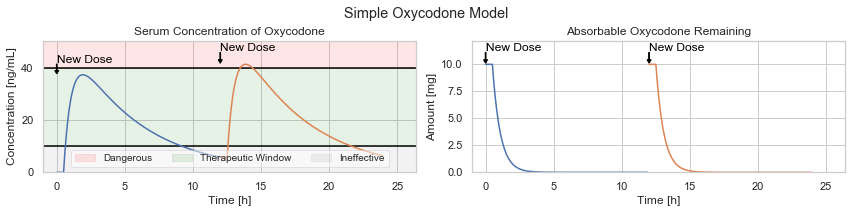

In [27]:
# Based on a 10 mg every 12 hours (Literature)
dose = 10e6 # in ng
num_doses = 2
Model_Time = 24 # hours
dt = .1 # equal to 0.1 hours
def simple_derivs(y, t, A, E, lag, V):
    g = y[0]
    b = y[1]
    dgdt = 0
    dbdt = -(E*b)
    if t > lag: # Accounts for lag in absorption
        dgdt = -A * g
        dbdt = (A*g/V) -(E*b)
    return [dgdt,dbdt]
# The values of the parameters A and E found from literature 
Vss = 2.6 # Volume of Distribution (Steady State) from literature (2.6 L/Kg)
mass = 78 # kg (ideal weight for a 6'0 male as calculated by the Devine formula (50 kg +0.9(h-152cm)))
V = Vss * mass *1000 # in mL
h_life_abs = 0.4 # hours from literature
h_life_eli = 3.5 # hours from literature
A = np.log(2)/h_life_abs # Formula for finding k of a first order reaction when given half-life
E = np.log(2)/h_life_eli # Formula for finding k of a first order reaction when given half-life
lag = .5 # time it takes before absoption starts. Most drugs take about 30 minutes.
# Define the time that the model runs through. This should be in factors of the dosage period of Oxycodone.
fig22,ax = plt.subplots(1,2,figsize = (12,3)) # Defined outside of for loop so that each new plot can be added on
sns.set(style = 'whitegrid') # Used Seaborn to make plots look nice
Time = [] # List containing time array of each new dose
G = [] # List containing intestinal oxycodone values for each dose
B = [] # List containing blood oxycodone values for each dose
y0 = [] # List of intial values for each compartment at time of new dose
ddt = Model_Time/num_doses
# Arbitrary parameters useful in setting x and ylim and annotating the graphs
bxmax = 1.1*Model_Time
gxmax = 1.1*Model_Time
bymax = 0 # actual value is defined inside for loop but defining it here allows usage after for loop
for i in range (num_doses):
    tint = i*ddt # hours
    tmax = tint + ddt # hours
    time = np.arange(tint, tmax, dt)
    Time.append(time)
    # The initial values of the compartments
    if i == 0:
        gi = dose # actual drug dose given
        bi = 0 # assuming that this is the patients first dose!
        y0 = [gi,bi]
    else:
        y0 = [G[i-1][-1]+dose,B[i-1][-1]]
    simple_sol = odeint(simple_derivs, y0, time, args = (A,E,lag+tint, V))
    g_simpleModel = simple_sol[:,0]/1e6 # Stores intestinal oxycodone in mg
    b_simpleModel = simple_sol[:,1] # Stores blood oxycodone in ng/mL
    
    G.append(simple_sol[:,0])
    B.append(simple_sol[:,1])        
    # Arbitrary parameters useful in setting ylim and annotating the graphs
    dby = max(b_simpleModel)
    dgy = max(g_simpleModel)
    bymax = max(b_simpleModel)+ 0.22*dby
    gymax = max(g_simpleModel)+ 0.22*dgy
    # Plots blood concentration of oxycodone over time
    ax[0].plot(time,b_simpleModel)
    ax[0].set_ylabel("Concentration [ng/mL]")
    ax[0].set_xlabel("Time [h]")
    ax[0].set_title("Serum Concentration of Oxycodone")
    if i == num_doses-1:
        ax[0].set_ylim(0,bymax) # Enables nice spacing of y-axis
        ax[0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[0].arrow(tint,bymax-.11*dby, 0,-0.1*dby, color = 'Black', width = 0.05, length_includes_head = True, 
                head_width = 0.3, head_length = 0.1*dby/3) # Generates an arrow indicating time of new dose
    ax[0].annotate('New Dose', xy = (tint,bymax-.1*dby), color = 'Black') # Labels new dose
    # Plots absorbable oxycodone over time
    ax[1].plot(time,g_simpleModel)
    ax[1].set_ylabel("Amount [mg]")
    ax[1].set_xlabel("Time [h]")
    ax[1].set_title("Absorbable Oxycodone Remaining")
    if i == num_doses-1:
        ax[1].set_ylim(0,gymax) # Enables nice spacing of y-axis
        ax[1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
    ax[1].arrow(tint,gymax-.11*dgy, 0,-0.1*dgy, color = 'Black', width = 0.05, length_includes_head = True,
                head_width = .3, head_length = 0.1*dgy/3) # Generates an arrow indicating time of new dose
    ax[1].annotate('New Dose', xy = (tint,gymax-.1*dgy), color = 'Black') # Labels new dose

# Plots the Therapeutic Window:
tWindowMin = 10 # ng/mL found from literature
tWindowMax = 40 # ng/mL found from literature
ax[0].hlines(tWindowMax, -1, bxmax, color = 'black')
ax[0].hlines(tWindowMin, -1, bxmax, color = 'black')
ax[0].fill_between([-1,bxmax],tWindowMax,bymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[0].fill_between([-1,bxmax],tWindowMin,tWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[0].fill_between([-1,bxmax],0,tWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[0].legend(loc = 'lower center', fontsize = 'small', ncol = 3, framealpha = 0.5)
fig22.suptitle("Simple Oxycodone Model") # Gives overall title
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aligns subplots nicely and allows padding for title

#### CYP3A4 & Ritonavir
___
<img src="COMP_Model2.jpg" width=450px>

The next model considers the impact that the enzyme CYP3A4 has in the process of clearing oxycodone from the blood as well as the impact that ritonavir will have on the active CYP3A4 amount present. In essence, the only thing different about this model is the fact that the process of elimination is dependendant on the amount of active CYP3A4 available to metabolize the oxycodone to an excretable form and the concentration of ritonavir present to inhibit CYP3A4. Notice that there are six compartments (Intestine Dose and Blood Concentration of oxycodone and ritonavir respectively, and Active CYP3A4 and Inactive CYP3A4) and 4 paramenters (K<sub>absorption</sub> and K<sub>elimination</sub> for oxycodone and ritonavir respectively). For the purpose of the code, oxycodone's K<sub>absorption</sub> and K<sub>elimination</sub> will referred to as ***oA*** and ***oE***, respectively, and ritonavir's K<sub>absorption</sub> and K<sub>elimination</sub> will referred to as ***rA*** and ***rE***, respectively. Likewise, oxycodone's Intestine Dose and Blood Concentration will be known as **Og** and **Ob** while ritonavir's Intestine Dose and Blood Concentration will be known as **Rg** and **Rb**. Active CYP3A4 will be known as **aC** and Inactive CYP3A4 will be called **iC**. Finally, CYP3A4's K<sub>inhibition</sub> will be ***Ki***.

The ODE version of this, using the notation in the code below, is: 

$\frac{dOg}{dt} = -oAOg,$ $\frac{dOb}{dt} = oAOg - oEObaC,$ $\frac{dRg}{dt} = -rARg,$ $\frac{dRb}{dt} = rARg - rERb-\frac{Ki\frac{daC}{dt}}{aC^2},$ $\frac{daC}{dt} = \frac{-(aC^2)\frac{dRb}{dt}}{Ki},$ $\frac{diC}{dt} = \frac{(aC^2)\frac{dRb}{dt}}{Ki}$

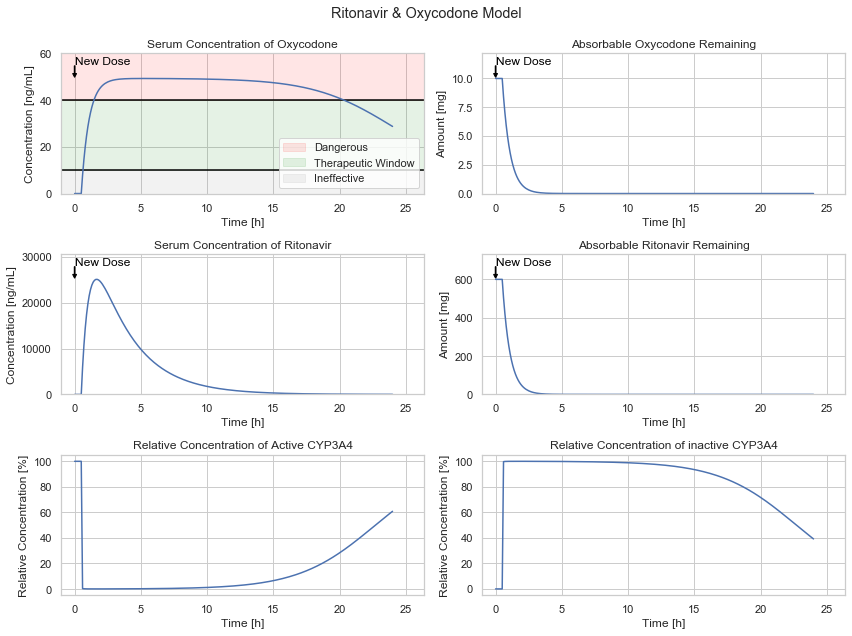

In [28]:
# Defined the derivative function for each compartment using the ODE's above
def CYP_derivs(y, t, oA, oE,rA,rE,Ki, lag, OV, RV):
    Og = y[0]
    Ob = y[1]
    Rg = y[2]
    Rb = y[3]
    aC = y[4]
    iC = y[5]
    dOgdt = 0
    dObdt = -(oE*Ob*aC)
    dRgdt = 0
    dRbdt = -(rE*Rb)
    daCdt = -(aC**2)*dRbdt/Ki # aC * Rb/iC = Ki, and aC +iC = 1, so differentiate respect to aC.
    diCdt = -daCdt
    dRbdt = -(rE*Rb)- daCdt*Ki/(aC**2)
    if t > lag: 
        dOgdt = -oA * Og
        dObdt = (oA*Og/OV) - (oE*Ob*aC)
        dRgdt = -rA * Rg
        dRbdt = (rA * Rg/RV) - (rE*Rb)
        daCdt = -(aC**2)*dRbdt/Ki # aC * Rb/iC = Ki, and aC +iC = 1, so differentiate respect to aC.
        diCdt = -daCdt
        dRbdt = (rA * Rg/RV) - (rE*Rb) - daCdt*Ki/(aC**2)
        
    return [dOgdt,dObdt,dRgdt,dRbdt,daCdt,diCdt]
# The initial values of the compartments
Ogi = 10e6 # actual drug dose given 10mg = 10e6 ng
Obi = 0 # assuming that this is the patients first dose!
Rgi = 600e6 # actual drug dose given 600mg = 600e6 ng
Rbi = 0 # assuming that this is the patients first dose!
aCi = 1 # relative concentration
iCi = 0 # relative concentration
y0 = [Ogi,Obi,Rgi,Rbi,aCi,iCi]
# The values of the parameters found from literature 
OVss = 2.6 # Volume of Distribution (Steady State) from literature (2.6 L/kg)
RVss = 0.41 # Volume of Distribution from literature (0.41 L/kg)
mass = 78 # kg (ideal weight for a 6'0 male as calculated by the Devine formula (50 kg +0.9(h-152cm)))
OV = OVss * mass *1000 # in mL
RV = RVss * mass *1000 # in mL
Oh_life_abs = 0.4 # hours from literature
Oh_life_eli = 3.5 # hours from literature
Rh_life_abs = 0.4 # hours from literature, peak should be within 2-4 hours.
Rh_life_eli = 4 # hours from literature
oA = np.log(2)/Oh_life_abs # Formula for finding k of a first order reaction when given half-life
oE = np.log(2)/Oh_life_eli # Formula for finding k of a first order reaction when given half-life
rA = np.log(2)/Rh_life_abs # Formula for finding k of a first order reaction when given half-life
rE = np.log(2)/Rh_life_eli # Formula for finding k of a first order reaction when given half-life
RIC50 = 0.015e-6 # units in moles/L IC50 is 0.015 microM from literature
molMassR = 720.946 # Used to convert IC50 to ng/mL
Ki = RIC50*molMassR*1e9/1000 # units are ng/mL
lag = .5 # time it takes before absoption starts. Most drugs take about 30 minutes.
# Define the time that the model runs through. This should be in factors of the dosage period of Oxycodone.
tint = 0 # hours
tmax = 24 # hours
dt = .1 # equal to .1 hours
time = np.arange(tint, tmax + dt, dt)
CYP_sol = odeint(CYP_derivs, y0, time, args = (oA, oE,rA,rE,Ki,lag+tint,OV,RV))
Og_CYPModel = CYP_sol[:,0]/1e6 # Stores intestinal oxycodone in mg
Ob_CYPModel = CYP_sol[:,1] # Stores blood oxycodone in ng/mL
Rg_CYPModel = CYP_sol[:,2]/1e6 # Stores intestinal ritonavir in mg
Rb_CYPModel = CYP_sol[:,3] # Stores blood ritonavir in ng/mL
aC_CYPModel = CYP_sol[:,4]*100 # Stores relative concentration of active CYP3A4
iC_CYPModel = CYP_sol[:,5]*100 # Stores relative concentration of inactive CYP3A4
tWindowMin = 10 # ng/mL found from literature
tWindowMax = 40 # ng/mL found from literature

sns.set(style = 'whitegrid') # Used Seaborn to make plots look nice
# Arbitrary parameters useful in setting x and ylim and annotating the graphs
Odby = max(Ob_CYPModel)
Odgy = max(Og_CYPModel)
Obymax = max(Ob_CYPModel)+ 0.22*Odby
Ogymax = max(Og_CYPModel)+ 0.22*Odgy

Rdby = max(Rb_CYPModel)
Rdgy = max(Rg_CYPModel)
Rbymax = max(Rb_CYPModel)+ 0.22*Rdby
Rgymax = max(Rg_CYPModel)+ 0.22*Rdgy

bxmax = 1.1*max(time)
gxmax = 1.1*max(time)

fig31,ax = plt.subplots(3,2,figsize = (12,9))
# Plots blood concentration of oxycodone over time
ax[0,0].plot(time,Ob_CYPModel)
ax[0,0].set_ylabel("Concentration [ng/mL]")
ax[0,0].set_xlabel("Time [h]")
ax[0,0].set_title("Serum Concentration of Oxycodone")
ax[0,0].set_ylim(0,Obymax) # Enables nice spacing of y-axis
ax[0,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[0,0].arrow(tint,Obymax-.11*Odby, 0,-0.1*Odby, color = 'Black', width = 0.05, length_includes_head = True, 
            head_width = 0.3, head_length = 0.1*Odby/3) # Generates an arrow indicating time of new dose
ax[0,0].annotate('New Dose', xy = (tint,Obymax-.1*Odby), color = 'Black') # Labels new dose
# Plots amount of absorbable oxycodone over time
ax[0,1].plot(time,Og_CYPModel)
ax[0,1].set_ylabel("Amount [mg]")
ax[0,1].set_xlabel("Time [h]")
ax[0,1].set_title("Absorbable Oxycodone Remaining")
ax[0,1].set_ylim(0,Ogymax) # Enables nice spacing of y-axis
ax[0,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
ax[0,1].arrow(tint,Ogymax-.11*Odgy, 0,-0.1*Odgy, color = 'Black', width = 0.05, length_includes_head = True,
            head_width = .3, head_length = 0.1*Odgy/3) # Generates an arrow indicating time of new dose
ax[0,1].annotate('New Dose', xy = (tint,Ogymax-.1*Odgy), color = 'Black') # Labels new dose
# Plots blood concentration of ritonavir over time
ax[1,0].plot(time,Rb_CYPModel)
ax[1,0].set_ylabel("Concentration [ng/mL]")
ax[1,0].set_xlabel("Time [h]")
ax[1,0].set_title("Serum Concentration of Ritonavir")
ax[1,0].set_ylim(0,Rbymax) # Enables nice spacing of y-axis
ax[1,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[1,0].arrow(tint,Rbymax-.11*Rdby, 0,-0.1*Rdby, color = 'Black', width = 0.05, length_includes_head = True, 
            head_width = 0.3, head_length = 0.1*Rdby/3) # Generates an arrow indicating time of new dose
ax[1,0].annotate('New Dose', xy = (tint,Rbymax-.1*Rdby), color = 'Black') # Labels new dose
# Plots amount of absorbable ritonavir over time
ax[1,1].plot(time,Rg_CYPModel)
ax[1,1].set_ylabel("Amount [mg]")
ax[1,1].set_xlabel("Time [h]")
ax[1,1].set_title("Absorbable Ritonavir Remaining")
ax[1,1].set_ylim(0,Rgymax) # Enables nice spacing of y-axis
ax[1,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
ax[1,1].arrow(tint,Rgymax-.11*Rdgy, 0,-0.1*Rdgy, color = 'Black', width = 0.05, length_includes_head = True,
            head_width = .3, head_length = 0.1*Rdgy/3) # Generates an arrow indicating time of new dose
ax[1,1].annotate('New Dose', xy = (tint,Rgymax-.1*Rdgy), color = 'Black') # Labels new dose
# Plots relative concentration of active CYP3A4 over time
ax[2,0].plot(time,aC_CYPModel)
ax[2,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[2,0].set_ylabel("Relative Concentration [%]")
ax[2,0].set_xlabel("Time [h]")
ax[2,0].set_title("Relative Concentration of Active CYP3A4")
# Plots relative concentration of inactive CYP3A4 over time
ax[2,1].plot(time,iC_CYPModel)
ax[2,1].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[2,1].set_ylabel("Relative Concentration [%]")
ax[2,1].set_xlabel("Time [h]")
ax[2,1].set_title("Relative Concentration of inactive CYP3A4")
# Plots the Therapeutic Window:
ax[0,0].hlines(tWindowMax, -1, bxmax, color = 'black')
ax[0,0].hlines(tWindowMin, -1, bxmax, color = 'black')
ax[0,0].fill_between([-1,bxmax],tWindowMax,Obymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[0,0].fill_between([-1,bxmax],tWindowMin,tWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[0,0].fill_between([-1,bxmax],0,tWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[0,0].legend()
fig31.suptitle("Ritonavir & Oxycodone Model") # Gives overall title
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aligns subplots nicely and allows padding for title

**Multiple Doses**

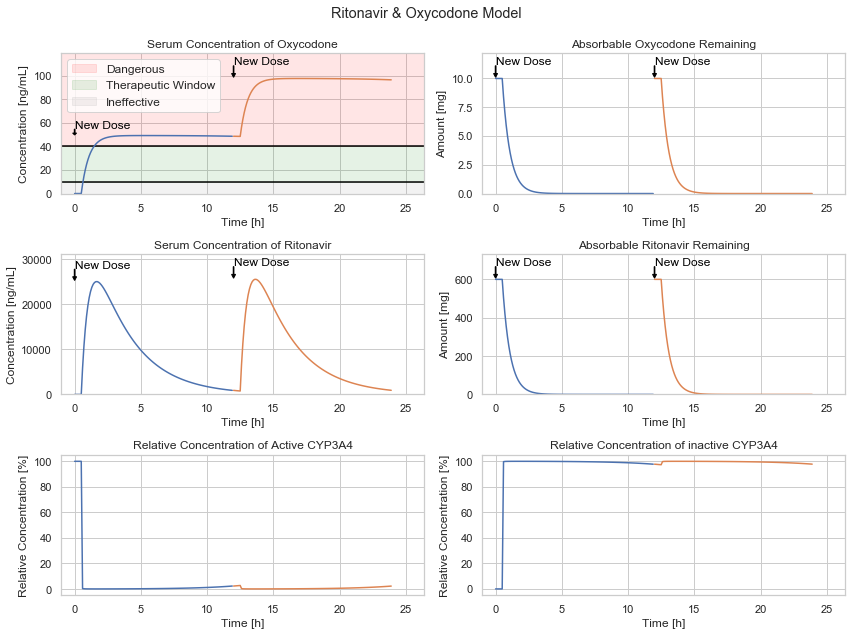

In [29]:
# based on a 10 mg every 12 hours 
Odose = 10e6 # in ng
Rdose = 600e6 # in ng
num_doses = 2
Model_Time = 24 # hours
dt = .1 # equal to .1 hours
def CYP_derivs(y, t, oA, oE,rA,rE,Ki, lag, OV, RV):
    Og = y[0]
    Ob = y[1]
    Rg = y[2]
    Rb = y[3]
    aC = y[4]
    iC = y[5]
    dOgdt = 0
    dObdt = -(oE*Ob*aC)
    dRgdt = 0
    dRbdt = -(rE*Rb)
    daCdt = -(aC**2)*dRbdt/Ki # aC * Rb/iC = Ki, and aC +iC = 1, so differentiate respect to aC.
    diCdt = -daCdt
    dRbdt = -(rE*Rb) - daCdt*Ki/(aC**2)
    if t > lag: 
        dOgdt = -oA * Og
        dObdt = (oA*Og/OV) - (oE*Ob*aC)
        dRgdt = -rA * Rg
        dRbdt = (rA * Rg/RV) - (rE*Rb)
        daCdt = -(aC**2)*dRbdt/Ki # aC * Rb/iC = Ki, and aC +iC = 1, so differentiate respect to aC.
        diCdt = -daCdt
        dRbdt = (rA * Rg/RV) - (rE*Rb) - daCdt*Ki/(aC**2)
        
    return [dOgdt,dObdt,dRgdt,dRbdt,daCdt,diCdt]
# The values of the parameters found from literature 
OVss = 2.6 # volume of Distribution (Steady State) from literature (2.6 L/kg)
RVss = 0.41 # Volume of Distribution from literature (0.41 L/kg)
mass = 78 # kg (ideal weight for a 6'0 male as calculated by the Devine formula (50 kg +0.9(h-152cm)))
OV = OVss * mass *1000 # in mL
RV = RVss * mass *1000 # in mL
Oh_life_abs = 0.4 # hours from literature
Oh_life_eli = 3.5 # hours from literature
Rh_life_abs = 0.4 # hours from literature, peak should be within 2-4 hours.
Rh_life_eli = 4 # hours from literature
oA = np.log(2)/Oh_life_abs # Formula for finding k of a first order reaction when given half-life
oE = np.log(2)/Oh_life_eli # Formula for finding k of a first order reaction when given half-life
rA = np.log(2)/Rh_life_abs # Formula for finding k of a first order reaction when given half-life
rE = np.log(2)/Rh_life_eli # Formula for finding k of a first order reaction when given half-life
RIC50 = 0.015e-6 # units in moles/L IC50 is 0.015 microM from literature
molMassR = 720.946 # Used to convert IC50 to ng/mL
Ki = RIC50*molMassR*1e9/1000 # units are ng/mL
lag = .5 # time it takes before absoption starts. Most drugs take about 30 minutes.

# Define the time that the model runs through. This should be in factors of the dosage period of Oxycodone.
fig32,ax = plt.subplots(3,2,figsize = (12,9))
sns.set(style = 'whitegrid') # Used Seaborn to make plots look nice
Time = [] # List containing time array of each new dose
OG = [] # List containing intestinal oxycodone values for each dose
OB = [] # List containing blood oxycodone values for each new dose
RG = [] # List containing intestinal ritonavir values for each new dose
RB = [] # List containing blood ritonavir values for each new dose
aCs = [] # List containing active CYP3A4 values for each new dose
iCs = [] # List containing inactive CYP3A4 values for each new dose
y0 = [] # List of intial values for each compartment at time of new dose
ddt = Model_Time/num_doses
# Arbitrary parameters useful in setting xlim and annotating the graphs
bxmax = 1.1*Model_Time
gxmax = 1.1*Model_Time
bymax = 0

for i in range (num_doses):
    tint = i*ddt
    tmax = tint + ddt # hours
    time = np.arange(tint, tmax, dt)
    Time.append(time)
    # The initial values of the compartments
    if i == 0:
        Ogi = Odose # actual drug dose given 10 mg = 10e6 ng
        Obi = 0 # assuming that this is the patients first dose!
        Rgi = Rdose # actual drug dose given 600 mg = 600e6 ng
        Rbi = 0 # assuming that this is the patients first dose!
        aCi = 1 # relative concentration
        iCi = 0 # relative concentration
        y0 = [Ogi,Obi,Rgi,Rbi,aCi,iCi]
    else:
        y0 = [OG[i-1][-1]+Odose,OB[i-1][-1],RG[i-1][-1]+Rdose,RB[i-1][-1],aCs[i-1][-1],iCs[i-1][-1]]
    
    CYP_sol = odeint(CYP_derivs, y0, time, args = (oA, oE,rA,rE,Ki,lag+tint,OV,RV))
    Og_CYPModel = CYP_sol[:,0]/1e6 # Stores intestinal oxycodone in mg
    Ob_CYPModel = CYP_sol[:,1] # Stores blood oxycodone in ng/mL
    Rg_CYPModel = CYP_sol[:,2]/1e6 # Stores intestinal ritonavir in mg
    Rb_CYPModel = CYP_sol[:,3] # Stores blood ritonavir in ng/mL
    aC_CYPModel = CYP_sol[:,4]*100 # Stores relative concentration of active CYP3A4
    iC_CYPModel = CYP_sol[:,5]*100 # Stores relative concentration of inactive CYP3A4

    OG.append(CYP_sol[:,0])
    OB.append(CYP_sol[:,1])
    RG.append(CYP_sol[:,2])
    RB.append(CYP_sol[:,3]) 
    aCs.append(CYP_sol[:,4])
    iCs.append(CYP_sol[:,5]) 
    
    # Arbitrary parameters useful in setting ylim and annotating the graphs
    Odby = max(Ob_CYPModel)
    Odgy = max(Og_CYPModel)
    Obymax = max(Ob_CYPModel)+ 0.22*Odby
    Ogymax = max(Og_CYPModel)+ 0.22*Odgy

    Rdby = max(Rb_CYPModel)
    Rdgy = max(Rg_CYPModel)
    Rbymax = max(Rb_CYPModel)+ 0.22*Rdby
    Rgymax = max(Rg_CYPModel)+ 0.22*Rdgy
    # Plots blood concentration of oxycodone over time
    ax[0,0].plot(time,Ob_CYPModel)
    ax[0,0].set_ylabel("Concentration [ng/mL]")
    ax[0,0].set_xlabel("Time [h]")
    ax[0,0].set_title("Serum Concentration of Oxycodone")
    if i == num_doses-1:
        ax[0,0].set_ylim(0,Obymax) # Enables nice spacing of y-axis
        ax[0,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[0,0].arrow(tint,Obymax-.11*Odby, 0,-0.1*Odby, color = 'Black', width = 0.05, length_includes_head = True, 
                  head_width = 0.3, head_length = 0.1*Odby/3) # Generates an arrow indicating time of new dose
    ax[0,0].annotate('New Dose', xy = (tint,Obymax-.1*Odby), color = 'Black') # Labels new dose
    # Plots amount of absobable oxycodone over time
    ax[0,1].plot(time,Og_CYPModel)
    ax[0,1].set_ylabel("Amount [mg]")
    ax[0,1].set_xlabel("Time [h]")
    ax[0,1].set_title("Absorbable Oxycodone Remaining")
    if i == num_doses-1:
        ax[0,1].set_ylim(0,Ogymax) # Enables nice spacing of y-axis
        ax[0,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
    ax[0,1].arrow(tint,Ogymax-.11*Odgy, 0,-0.1*Odgy, color = 'Black', width = 0.05, length_includes_head = True,
                head_width = .3, head_length = 0.1*Odgy/3) # Generates an arrow indicating time of new dose
    ax[0,1].annotate('New Dose', xy = (tint,Ogymax-.1*Odgy), color = 'Black') # Labels new dose
    # Plots blood concentration of ritonavir over time
    ax[1,0].plot(time,Rb_CYPModel)
    ax[1,0].set_ylabel("Concentration [ng/mL]")
    ax[1,0].set_xlabel("Time [h]")
    ax[1,0].set_title("Serum Concentration of Ritonavir")
    if i == num_doses-1:
        ax[1,0].set_ylim(0,Rbymax) # Enables nice spacing of y-axis
        ax[1,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[1,0].arrow(tint,Rbymax-.11*Rdby, 0,-0.1*Rdby, color = 'Black', width = 0.05, length_includes_head = True, 
                head_width = 0.3, head_length = 0.1*Rdby/3) # Generates an arrow indicating time of new dose
    ax[1,0].annotate('New Dose', xy = (tint,Rbymax-.1*Rdby), color = 'Black') # Labels new dose
    # Plots amount of absorbable ritonavir over time
    ax[1,1].plot(time,Rg_CYPModel)
    ax[1,1].set_ylabel("Amount [mg]")
    ax[1,1].set_xlabel("Time [h]")
    ax[1,1].set_title("Absorbable Ritonavir Remaining")
    if i == num_doses-1:
        ax[1,1].set_ylim(0,Rgymax) # Enables nice spacing of y-axis
        ax[1,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
    ax[1,1].arrow(tint,Rgymax-.11*Rdgy, 0,-0.1*Rdgy, color = 'Black', width = 0.05, length_includes_head = True,
                head_width = .3, head_length = 0.1*Rdgy/3) # Generates an arrow indicating time of new dose
    ax[1,1].annotate('New Dose', xy = (tint,Rgymax-.1*Rdgy), color = 'Black') # Labels new dose
    # Plots relative concentration of active CYP3A4 over time
    ax[2,0].plot(time,aC_CYPModel)
    if i == num_doses-1:
        ax[2,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[2,0].set_ylabel("Relative Concentration [%]")
    ax[2,0].set_xlabel("Time [h]")
    ax[2,0].set_title("Relative Concentration of Active CYP3A4")
    # Plots relative concentration of inactive CYP3A4 over time
    ax[2,1].plot(time,iC_CYPModel)
    if i == num_doses-1:
        ax[2,1].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[2,1].set_ylabel("Relative Concentration [%]")
    ax[2,1].set_xlabel("Time [h]")
    ax[2,1].set_title("Relative Concentration of inactive CYP3A4")
    
# Plots the Therapeutic Window:
tWindowMin = 10 # ng/mL found from literature
tWindowMax = 40 # ng/mL found from literature
ax[0,0].hlines(tWindowMax, -1, bxmax, color = 'black')
ax[0,0].hlines(tWindowMin, -1, bxmax, color = 'black')
ax[0,0].fill_between([-1,bxmax],tWindowMax,Obymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[0,0].fill_between([-1,bxmax],tWindowMin,tWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[0,0].fill_between([-1,bxmax],0,tWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[0,0].legend(loc = 'upper left', fontsize = 'medium', ncol = 1, framealpha = 0.8)
fig32.suptitle("Ritonavir & Oxycodone Model") # Gives overall title
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aligns subplots nicely and allows padding for title

####  Benzodiazepines
___

<img src="COMP_Model3.jpg" width=450px>

The next model considers the impact that a benzodiazepine known as alprazolam (Xanax) will have on the active CYP3A4 amount present, thereby affecting the metabolism of. Just as in the previous model, the rate of elimination is dependendant on the amount of active CYP3A4 available to metabolize the oxycodone. However, instead of inhibiting the enzyme (as ritonavir did), the benzodiazepine (Xanax) will competete with oxycodone for CYP3A4's active site, effectively reducing the overall amount of CYP3A4 available to metabolize oxycodone. Once again, there are six compartments (Intestine Dose and Blood Concentration of oxycodone and alprazolam respectively, and Oxycodone CYP3A4 and alprazolam CYP3A4) and 4 paramenters (K<sub>absorption</sub> and K<sub>elimination</sub> for oxycodone and alprazolam respectively). For the purpose of the code, oxycodone's K<sub>absorption</sub> and K<sub>elimination</sub> will referred to as ***oA*** and ***oE***, respectively, and alprazolam's K<sub>absorption</sub> and K<sub>elimination</sub> will referred to as ***xA*** and ***xE***, respectively. Likewise, oxycodone's Intestine Dose and Blood Concentration will be known as **Og** and **Ob** while alprazolam's Intestine Dose and Blood Concentration will be known as **Xg** and **Xb**. Oxycodone CYP3A4 will be known as **oC** and alprazolam CYP3A4 will be called **xC**. Finally, CYP3A4's K<sub>inhibition</sub> will be ***Ki***.

The ODE version of this, using the notation in the code below, is: 

$\frac{dOg}{dt} = -oAOg,$ $\frac{dOb}{dt} = oAOg - oEObaC,$ $\frac{dXg}{dt} = -xAXg,$ $\frac{dXb}{dt} = xAXg - xEXbaC,$ $\frac{daC}{dt} = -KiRbaC,$ $\frac{diC}{dt} = KiRbaC$

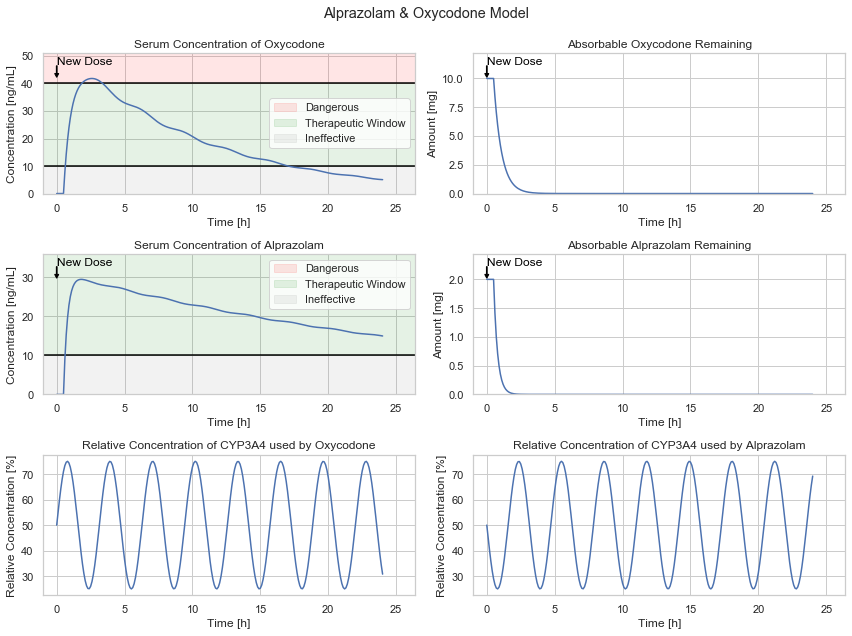

In [30]:
# Defined the derivative function for each compartment using the ODE's above
def Benzo_derivs(y, t, oA, oE,xA,xE, lag, OV, XV):
    Og = y[0]
    Ob = y[1]
    Xg = y[2]
    Xb = y[3]
    oC = y[4]
    xC = y[5]
    dOgdt = 0
    dObdt = -(oE*Ob*oC)
    dXgdt = 0
    dXbdt = -(xE*Xb*xC)
    doCdt = np.cos(2*t)*0.5 # oC +xC =1.
    dxCdt = -doCdt 
    if t > lag: # Accounts for lag in absorption
        dOgdt = -oA * Og
        dObdt = (oA*Og/OV) - (oE*Ob*oC)
        dXgdt = -xA * Xg
        dXbdt = (xA * Xg/XV) - (xE*Xb*xC)

    return [dOgdt,dObdt,dXgdt,dXbdt,doCdt,dxCdt]
# The initial values of the compartments
Ogi = 10e6 # actual drug dose given 10 mg = 10e6 ng
Obi = 0 # assuming that this is the patients first dose!
Xgi = 2e6 # actual drug dose given 2 mg = 2e6 ng
Xbi = 0 # assuming that this is the patients first dose!
oCi = 0.5 # relative concentration
xCi = 0.5 # relative concentration
y0 = [Ogi,Obi,Xgi,Xbi,oCi,xCi]
# The values of the parameters found from literature 
OVss = 2.6 # volume of Distribution (Steady State) from literature (2.6 L/kg)
XVss = 0.84 # Volume of Distribution from literature (0.84 L/kg)
mass = 78 # kg (ideal weight for a 6'0 male as calculated by the Devine formula (50 kg +0.9(h-152cm)))
OV = OVss * mass *1000 # in mL
XV = XVss * mass *1000 # in mL
Oh_life_abs = 0.4 # hours from literature
Oh_life_eli = 3.5 # hours from literature
Xh_life_abs = 0.2 # hours from literature, peak should be within 1-2 hours.
Xh_life_eli = 11.2 # hours from literature
oA = np.log(2)/Oh_life_abs # Formula for finding k of a first order reaction when given half-life
oE = np.log(2)/Oh_life_eli # Formula for finding k of a first order reaction when given half-life
xA = np.log(2)/Xh_life_abs # Formula for finding k of a first order reaction when given half-life
xE = np.log(2)/Xh_life_eli # Formula for finding k of a first order reaction when given half-life
lag = .5 # time it takes before absoption starts. Most drugs take about 30 minutes.
# Define the time that the model runs through. This should be in factors of the dosage period of Oxycodone.
tint = 0
tmax = 24 # hours
dt = .1 # equal to .1 hours
time = np.arange(tint, tmax + dt, dt)
Benzo_sol = odeint(Benzo_derivs, y0, time, args = (oA,oE,xA,xE,lag+tint,OV,XV))
Og_BenzoModel = Benzo_sol[:,0]/1e6 # Stores intestinal oxycodone in mg
Ob_BenzoModel = Benzo_sol[:,1] # Stores blood oxycodone in ng/mL
Xg_BenzoModel = Benzo_sol[:,2]/1e6 # Stores intestinal alprazolam in mg
Xb_BenzoModel = Benzo_sol[:,3] # Stores blood alprazolam in ng/mL
oC_BenzoModel = Benzo_sol[:,4]*100 # Stores relative concentration of oxycodone-metabolizing CYP3A4
xC_BenzoModel = Benzo_sol[:,5]*100 # Stores relative concentration of alprazolam-metabolizing CYP3A4
# Therapeutic window of oxycodone
OtWindowMin = 10 # ng/mL found from literature
OtWindowMax = 40 # ng/mL found from literature
# Therapeutic window of alprazolam
XtWindowMin = 10 # ng/mL found from literature
XtWindowMax = 50 # ng/mL found from literature

sns.set(style = 'whitegrid') # Used Seaborn to make plots look nice
Odby = max(Ob_BenzoModel)
Odgy = max(Og_BenzoModel)
Obymax = max(Ob_BenzoModel)+ 0.22*Odby
Ogymax = max(Og_BenzoModel)+ 0.22*Odgy
# Arbitrary parameters useful in setting x and ylim and annotating the graphs
Xdby = max(Xb_BenzoModel)
Xdgy = max(Xg_BenzoModel)
Xbymax = max(Xb_BenzoModel)+ 0.22*Xdby
Xgymax = max(Xg_BenzoModel)+ 0.22*Xdgy
bxmax = 1.1*max(time)
gxmax = 1.1*max(time)

fig41,ax = plt.subplots(3,2,figsize = (12,9))
# Plots blood concentration of oxycodone over time
ax[0,0].plot(time,Ob_BenzoModel)
ax[0,0].set_ylabel("Concentration [ng/mL]")
ax[0,0].set_xlabel("Time [h]")
ax[0,0].set_title("Serum Concentration of Oxycodone")
ax[0,0].set_ylim(0,Obymax) # Enables nice spacing of y-axis
ax[0,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[0,0].arrow(tint,Obymax-.11*Odby, 0,-0.1*Odby, color = 'Black', width = 0.05, length_includes_head = True, 
            head_width = 0.3, head_length = 0.1*Odby/3) # Generates an arrow indicating time of new dose
ax[0,0].annotate('New Dose', xy = (tint,Obymax-.1*Odby), color = 'Black') # Labels new dose
# Plots amount of absorbable oxycodone over time
ax[0,1].plot(time,Og_BenzoModel)
ax[0,1].set_ylabel("Amount [mg]")
ax[0,1].set_xlabel("Time [h]")
ax[0,1].set_title("Absorbable Oxycodone Remaining")
ax[0,1].set_ylim(0,Ogymax) # Enables nice spacing of y-axis
ax[0,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
ax[0,1].arrow(tint,Ogymax-.11*Odgy, 0,-0.1*Odgy, color = 'Black', width = 0.05, length_includes_head = True,
            head_width = .3, head_length = 0.1*Odgy/3) # Generates an arrow indicating time of new dose
ax[0,1].annotate('New Dose', xy = (tint,Ogymax-.1*Odgy), color = 'Black') # Labels new dose
# Plots blood concentration of alprazolam over time
ax[1,0].plot(time,Xb_BenzoModel)
ax[1,0].set_ylabel("Concentration [ng/mL]")
ax[1,0].set_xlabel("Time [h]")
ax[1,0].set_title("Serum Concentration of Alprazolam")
ax[1,0].set_ylim(0,Xbymax) # Enables nice spacing of y-axis
ax[1,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[1,0].arrow(tint,Xbymax-.11*Xdby, 0,-0.1*Xdby, color = 'Black', width = 0.05, length_includes_head = True, 
            head_width = 0.3, head_length = 0.1*Xdby/3) # Generates an arrow indicating time of new dose
ax[1,0].annotate('New Dose', xy = (tint,Xbymax-.1*Xdby), color = 'Black') # Labels new dose
# Plots amount of absorbable alprazolam over time
ax[1,1].plot(time,Xg_BenzoModel)
ax[1,1].set_ylabel("Amount [mg]")
ax[1,1].set_xlabel("Time [h]")
ax[1,1].set_title("Absorbable Alprazolam Remaining")
ax[1,1].set_ylim(0,Xgymax) # Enables nice spacing of y-axis
ax[1,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
ax[1,1].arrow(tint,Xgymax-.11*Xdgy, 0,-0.1*Xdgy, color = 'Black', width = 0.05, length_includes_head = True,
            head_width = .3, head_length = 0.1*Xdgy/3) # Generates an arrow indicating time of new dose
ax[1,1].annotate('New Dose', xy = (tint,Xgymax-.1*Xdgy), color = 'Black') # Labels new dose
# Plots relative concentration of oxycodone-metabolizing CYP3A4 over time
ax[2,0].plot(time,oC_BenzoModel)
ax[2,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[2,0].set_ylabel("Relative Concentration [%]")
ax[2,0].set_xlabel("Time [h]")
ax[2,0].set_title("Relative Concentration of CYP3A4 used by Oxycodone")
# Plots relative concentration of alprazolam-metabolizing CYP3A4 over time
ax[2,1].plot(time,xC_BenzoModel)
ax[2,1].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
ax[2,1].set_ylabel("Relative Concentration [%]")
ax[2,1].set_xlabel("Time [h]")
ax[2,1].set_title("Relative Concentration of CYP3A4 used by Alprazolam")
# Plots the Therapeutic Window:
# Therapeutic window of oxycodone
ax[0,0].hlines(OtWindowMax, -1, bxmax, color = 'black')
ax[0,0].hlines(OtWindowMin, -1, bxmax, color = 'black')
ax[0,0].fill_between([-1,bxmax],OtWindowMax,Obymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[0,0].fill_between([-1,bxmax],OtWindowMin,OtWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[0,0].fill_between([-1,bxmax],0,OtWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[0,0].legend(loc= 'center right')
# Therapeutic window of alprazolam
ax[1,0].hlines(XtWindowMax, -1, bxmax, color = 'black')
ax[1,0].hlines(XtWindowMin, -1, bxmax, color = 'black')
ax[1,0].fill_between([-1,bxmax],XtWindowMax,Xbymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[1,0].fill_between([-1,bxmax],XtWindowMin,XtWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[1,0].fill_between([-1,bxmax],0,XtWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[1,0].legend()
fig41.suptitle("Alprazolam & Oxycodone Model") # Gives overall title
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aligns subplots nicely and allows padding for title

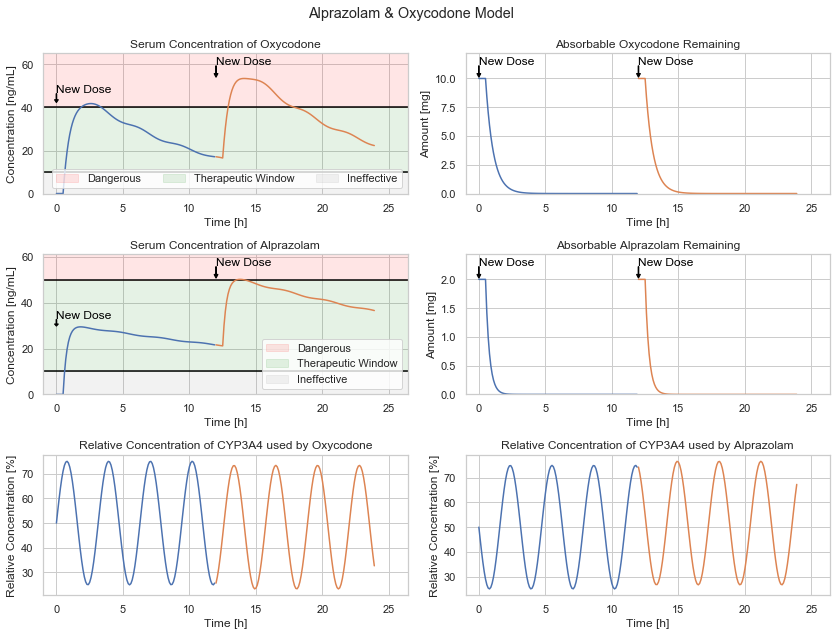

In [31]:
# based on a 10 mg every 12 hours 
Odose = 10e6 # in ng
Xdose = 2e6 # in ng
num_doses = 2
Model_Time = 24 # hours
dt = .1 # equal to .1 hours
def Benzo_derivs(y, t, oA, oE, xA, xE, lag, OV, XV):
    Og = y[0]
    Ob = y[1]
    Xg = y[2]
    Xb = y[3]
    oC = y[4]
    xC = y[5]
    dOgdt = 0
    dObdt = -(oE*Ob*oC)
    dXgdt = 0
    dXbdt = -(xE*Xb*xC)
    doCdt = np.cos(2*t)*0.5 # oC +xC =1.
    dxCdt = -doCdt 
    if t > lag: # Accounts for lag in absorption
        dOgdt = -oA * Og
        dObdt = (oA*Og/OV) - (oE*Ob*oC)
        dXgdt = -xA * Xg
        dXbdt = (xA * Xg/XV) - (xE*Xb*xC)

    return [dOgdt,dObdt,dXgdt,dXbdt,doCdt,dxCdt]
# The values of the parameters found from literature 
OVss = 2.6 # volume of Distribution (Steady State) from literature (2.6 L/kg)
XVss = 0.84 # Volume of Distribution from literature (0.84 L/kg)
mass = 78 # kg (ideal weight for a 6'0 male as calculated by the Devine formula (50 kg +0.9(h-152cm)))
OV = OVss * mass *1000 # in mL
XV = XVss * mass *1000 # in mL
Oh_life_abs = 0.4 # hours from literature
Oh_life_eli = 3.5 # hours from literature
Xh_life_abs = 0.2 # hours from literature, peak should be within 1-2 hours.
Xh_life_eli = 11.2 # hours from literature
oA = np.log(2)/Oh_life_abs # Formula for finding k of a first order reaction when given half-life
oE = np.log(2)/Oh_life_eli # Formula for finding k of a first order reaction when given half-life
xA = np.log(2)/Xh_life_abs # Formula for finding k of a first order reaction when given half-life
xE = np.log(2)/Xh_life_eli # Formula for finding k of a first order reaction when given half-life
lag = .5 # time it takes before absoption starts. Most drugs take about 30 minutes.

# Define the time that the model runs through. This should be in factors of the dosage period of Oxycodone.
fig42,ax = plt.subplots(3,2,figsize = (12,9))
sns.set(style = 'whitegrid') # Used Seaborn to make plots look nice
Time = [] # List containing time array of each new dose
OG = [] # List containing intestinal oxycodone values for each new dose
OB = [] # List containing blood oxycodone values for each new dose
XG = [] # List containing intestinal alprazolam values for each new dose
XB = [] # List containing blood alprazolam values foreach new dose
oCs = [] # List containing oxycodone-metabolizing CYP3A4 for each new dose
xCs = [] # List containing alprazolam-metabolizing CYP3A4 for each new dose
y0 = [] # List of intial values for each compartment at time of new dose
ddt = Model_Time/num_doses
# Arbitrary parameters useful in setting xlim and annotating the graphs
bxmax = 1.1*Model_Time
gxmax = 1.1*Model_Time
bymax = 0

for i in range (num_doses):
    tint = i*ddt
    tmax = tint + ddt# hours
    time = np.arange(tint, tmax, dt)
    Time.append(time)
    # The initial values of the compartments
    if i == 0:
        Ogi = Odose # actual drug dose given 10 mg = 10e6 ng
        Obi = 0 # assuming that this is the patients first dose!
        Xgi = Xdose # actual drug dose given 2 mg = 2e6 ng
        Rbi = 0 # assuming that this is the patients first dose!
        oCi = 0.5 # relative concentration
        xCi = 0.5 # relative concentration
        y0 = [Ogi,Obi,Xgi,Xbi,oCi,xCi]
    else:
        y0 = [OG[i-1][-1]+Odose,OB[i-1][-1],XG[i-1][-1]+Xdose,XB[i-1][-1],oCs[i-1][-1],xCs[i-1][-1]]
    
    Benzo_sol = odeint(Benzo_derivs, y0, time, args = (oA,oE,xA,xE,lag+tint,OV,XV))
    Og_BenzoModel = Benzo_sol[:,0]/1e6 # Stores intestinal oxycodone in mg
    Ob_BenzoModel = Benzo_sol[:,1] # Stores blood oxycodone in ng/mL
    Xg_BenzoModel = Benzo_sol[:,2]/1e6 # Stores intestinal alprazolam in mg
    Xb_BenzoModel = Benzo_sol[:,3] # Stores blood alprazolam in ng/mL
    oC_BenzoModel = Benzo_sol[:,4]*100 # Stores relative concentration of oxycodone-metabolizing CYP3A4
    xC_BenzoModel = Benzo_sol[:,5]*100 # Stores relative concentration of alprazolam-metabolizing CYP3A4
    OG.append(Benzo_sol[:,0])
    OB.append(Benzo_sol[:,1])
    XG.append(Benzo_sol[:,2])
    XB.append(Benzo_sol[:,3]) 
    oCs.append(Benzo_sol[:,4])
    xCs.append(Benzo_sol[:,5]) 
    # Arbitrary parameters useful in setting ylim and annotating the graphs
    Odby = max(Ob_BenzoModel)
    Odgy = max(Og_BenzoModel)
    Obymax = max(Ob_BenzoModel)+ 0.22*Odby
    Ogymax = max(Og_BenzoModel)+ 0.22*Odgy

    Xdby = max(Xb_BenzoModel)
    Xdgy = max(Xg_BenzoModel)
    Xbymax = max(Xb_BenzoModel)+ 0.22*Xdby
    Xgymax = max(Xg_BenzoModel)+ 0.22*Xdgy
    # Plots blood concentration of oxycodone over time
    ax[0,0].plot(time,Ob_BenzoModel)
    ax[0,0].set_ylabel("Concentration [ng/mL]")
    ax[0,0].set_xlabel("Time [h]")
    ax[0,0].set_title("Serum Concentration of Oxycodone")
    if i == num_doses-1:
        ax[0,0].set_ylim(0,Obymax) # Enables nice spacing of y-axis
        ax[0,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[0,0].arrow(tint,Obymax-.11*Odby, 0,-0.1*Odby, color = 'Black', width = 0.05, length_includes_head = True, 
                head_width = 0.3, head_length = 0.1*Odby/3) # Generates an arrow indicating time of new dose
    ax[0,0].annotate('New Dose', xy = (tint,Obymax-.1*Odby), color = 'Black') # Labels new dose
    # Plots amount of absorbable oxycodone over time
    ax[0,1].plot(time,Og_BenzoModel)
    ax[0,1].set_ylabel("Amount [mg]")
    ax[0,1].set_xlabel("Time [h]")
    ax[0,1].set_title("Absorbable Oxycodone Remaining")
    if i == num_doses-1:
        ax[0,1].set_ylim(0,Ogymax) # Enables nice spacing of y-axis
        ax[0,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
    ax[0,1].set_ylim(0,Ogymax)
    ax[0,1].arrow(tint,Ogymax-.11*Odgy, 0,-0.1*Odgy, color = 'Black', width = 0.05, length_includes_head = True,
                head_width = .3, head_length = 0.1*Odgy/3) # Generates an arrow indicating time of new dose
    ax[0,1].annotate('New Dose', xy = (tint,Ogymax-.1*Odgy), color = 'Black') # Labels new dose
    # Plots blood concentration of alprazolam over time
    ax[1,0].plot(time,Xb_BenzoModel)
    ax[1,0].set_ylabel("Concentration [ng/mL]")
    ax[1,0].set_xlabel("Time [h]")
    ax[1,0].set_title("Serum Concentration of Alprazolam")
    if i == num_doses-1:
        ax[1,0].set_ylim(0,Xbymax) # Enables nice spacing of y-axis
        ax[1,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[1,0].arrow(tint,Xbymax-.11*Xdby, 0,-0.1*Xdby, color = 'Black', width = 0.05, length_includes_head = True, 
                head_width = 0.3, head_length = 0.1*Xdby/3) # Generates an arrow indicating time of new dose
    ax[1,0].annotate('New Dose', xy = (tint,Xbymax-.1*Xdby), color = 'Black') # Labels new dose
    # Plots amount of absorbable alprazolam over time
    ax[1,1].plot(time,Xg_BenzoModel)
    ax[1,1].set_ylabel("Amount [mg]")
    ax[1,1].set_xlabel("Time [h]")
    ax[1,1].set_title("Absorbable Alprazolam Remaining")
    if i == num_doses-1:
        ax[1,1].set_ylim(0,Xgymax) # Enables nice spacing of y-axis
        ax[1,1].set_xlim(-1,gxmax) # Enables nice spacing of x-axis
    ax[1,1].arrow(tint,Xgymax-.11*Xdgy, 0,-0.1*Xdgy, color = 'Black', width = 0.05, length_includes_head = True,
                head_width = .3, head_length = 0.1*Xdgy/3) # Generates an arrow indicating time of new dose
    ax[1,1].annotate('New Dose', xy = (tint,Xgymax-.1*Xdgy), color = 'Black') # Labels new dose
    # Plots relative concentration of oxycodone-metabolizing CYP3A4 over time
    ax[2,0].plot(time,oC_BenzoModel)
    if i == num_doses-1:
        ax[2,0].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[2,0].set_ylabel("Relative Concentration [%]")
    ax[2,0].set_xlabel("Time [h]")
    ax[2,0].set_title("Relative Concentration of CYP3A4 used by Oxycodone")
    # Plots relative concentration of alprazolam-metabolizing CYP3A4 over time
    ax[2,1].plot(time,xC_BenzoModel)
    if i == num_doses-1:
        ax[2,1].set_xlim(-1,bxmax) # Enables nice spacing of x-axis
    ax[2,1].set_ylabel("Relative Concentration [%]")
    ax[2,1].set_xlabel("Time [h]")
    ax[2,1].set_title("Relative Concentration of CYP3A4 used by Alprazolam")
# Plots the Therapeutic Window:
# Therapeutic window of oxycodone
OtWindowMin = 10 # ng/mL found from literature
OtWindowMax = 40 # ng/mL found from literature
ax[0,0].hlines(OtWindowMax, -1, bxmax, color = 'black')
ax[0,0].hlines(OtWindowMin, -1, bxmax, color = 'black')
ax[0,0].fill_between([-1,bxmax],OtWindowMax,Obymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[0,0].fill_between([-1,bxmax],OtWindowMin,OtWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[0,0].fill_between([-1,bxmax],0,OtWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[0,0].legend(loc = 'lower right', ncol =3)
# Therapeutic window of alprazolam
XtWindowMin = 10 # ng/mL found from literature
XtWindowMax = 50 # ng/mL found from literature
ax[1,0].hlines(XtWindowMax, -1, bxmax, color = 'black')
ax[1,0].hlines(XtWindowMin, -1, bxmax, color = 'black')
ax[1,0].fill_between([-1,bxmax],XtWindowMax,Xbymax, color = 'Red', alpha = 0.1, label = 'Dangerous')
ax[1,0].fill_between([-1,bxmax],XtWindowMin,XtWindowMax, color = 'Green', alpha = 0.1, label = 'Therapeutic Window')
ax[1,0].fill_between([-1,bxmax],0,XtWindowMin, color = 'Grey', alpha = 0.1, label = 'Ineffective')
ax[1,0].legend(loc = 'lower right')
fig42.suptitle("Alprazolam & Oxycodone Model") # Gives overall title
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Aligns subplots nicely and allows padding for title

## Results

### Opioid Crisis
___
From 1999 to 2017, the fatality rate of opioids has gone up 1381.93% in Michigan and 348.22% in the United States, with increases from 0.35082 to 5.19889 deaths per 100,000 people and from 0.98359 to 4.40863 deaths per 100,000 people for Michigan and the United States, respectively. In fact, the fatality rates of all five categories of drugs have increased dramatically since 1999 in both Michigan, the United States, and in each region of the United States. Specifically for opioids, the mean fatality rate has increased from 0.6163 to 4.6373 deaths per 100,000 people in the Northeast, 0.4767 to 4.2059 deaths per 100,000 people in the Midwest, 0.8634 to 6.0394 deaths per 100,000 people in the South, and 2.7689 to 4.7590 deaths per 100,000 people in the West.

From 2000 to 2017, oxycodone sales have gone up 170.5% in Michigan and 186.27% in the entire United States, with increases from 4.44692 to 12.02877 kilograms per 100,000 people and from 5.51069 to 15.77549 kilograms per 100,000 people for Michigan and the United States, respectively. These increases are consistent with that of the four regions of the US. Specifically, sales have increased from 8.0703 to 17.6647 kilograms per 100,000 people in the Northeast, 4.3599 to 11.9954 kilograms per 100,000 people in the Midwest, 6.8070 to 19.2167 kilograms per 100,000 people in the South, and 5.8520 to 18.3413 kilograms per 100,000 people in the West.

Likewise, from 2000 to 2017, hydrocodone sales have increased by 191.81% in Michigan and 69.39% overall in the United States, with increases from 5.47137 to 15.96582 kilograms per 100,000 people and from 5.08323 to 8.6105 kilograms per 100,000 people for Michigan and the United States, respectively. Once again, these increases are consistent with that of the four regions of the US. Specifically, sales have increased from 3.0586 to 3.2426 kilograms per 100,000 people in the Northeast, 3.6689 to 8.8182 kilograms per 100,000 people in the Midwest, 6.4696 to 11.3394 kilograms per 100,000 people in the South, and 5.0613 to 8.6178 kilograms per 100,000 people in the West.

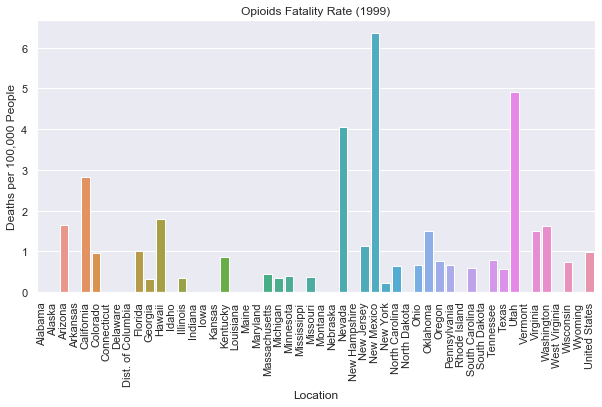

In [48]:
fig1.savefig("./images/OpioidsFatality1999.jpg")
fig1

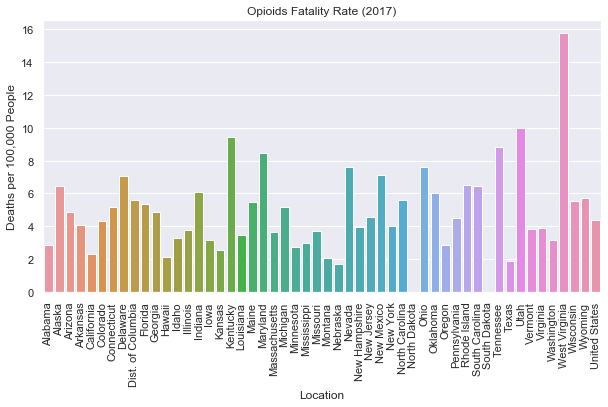

In [49]:
fig2.savefig("./images/OpioidsFatality2017.jpg")
fig2

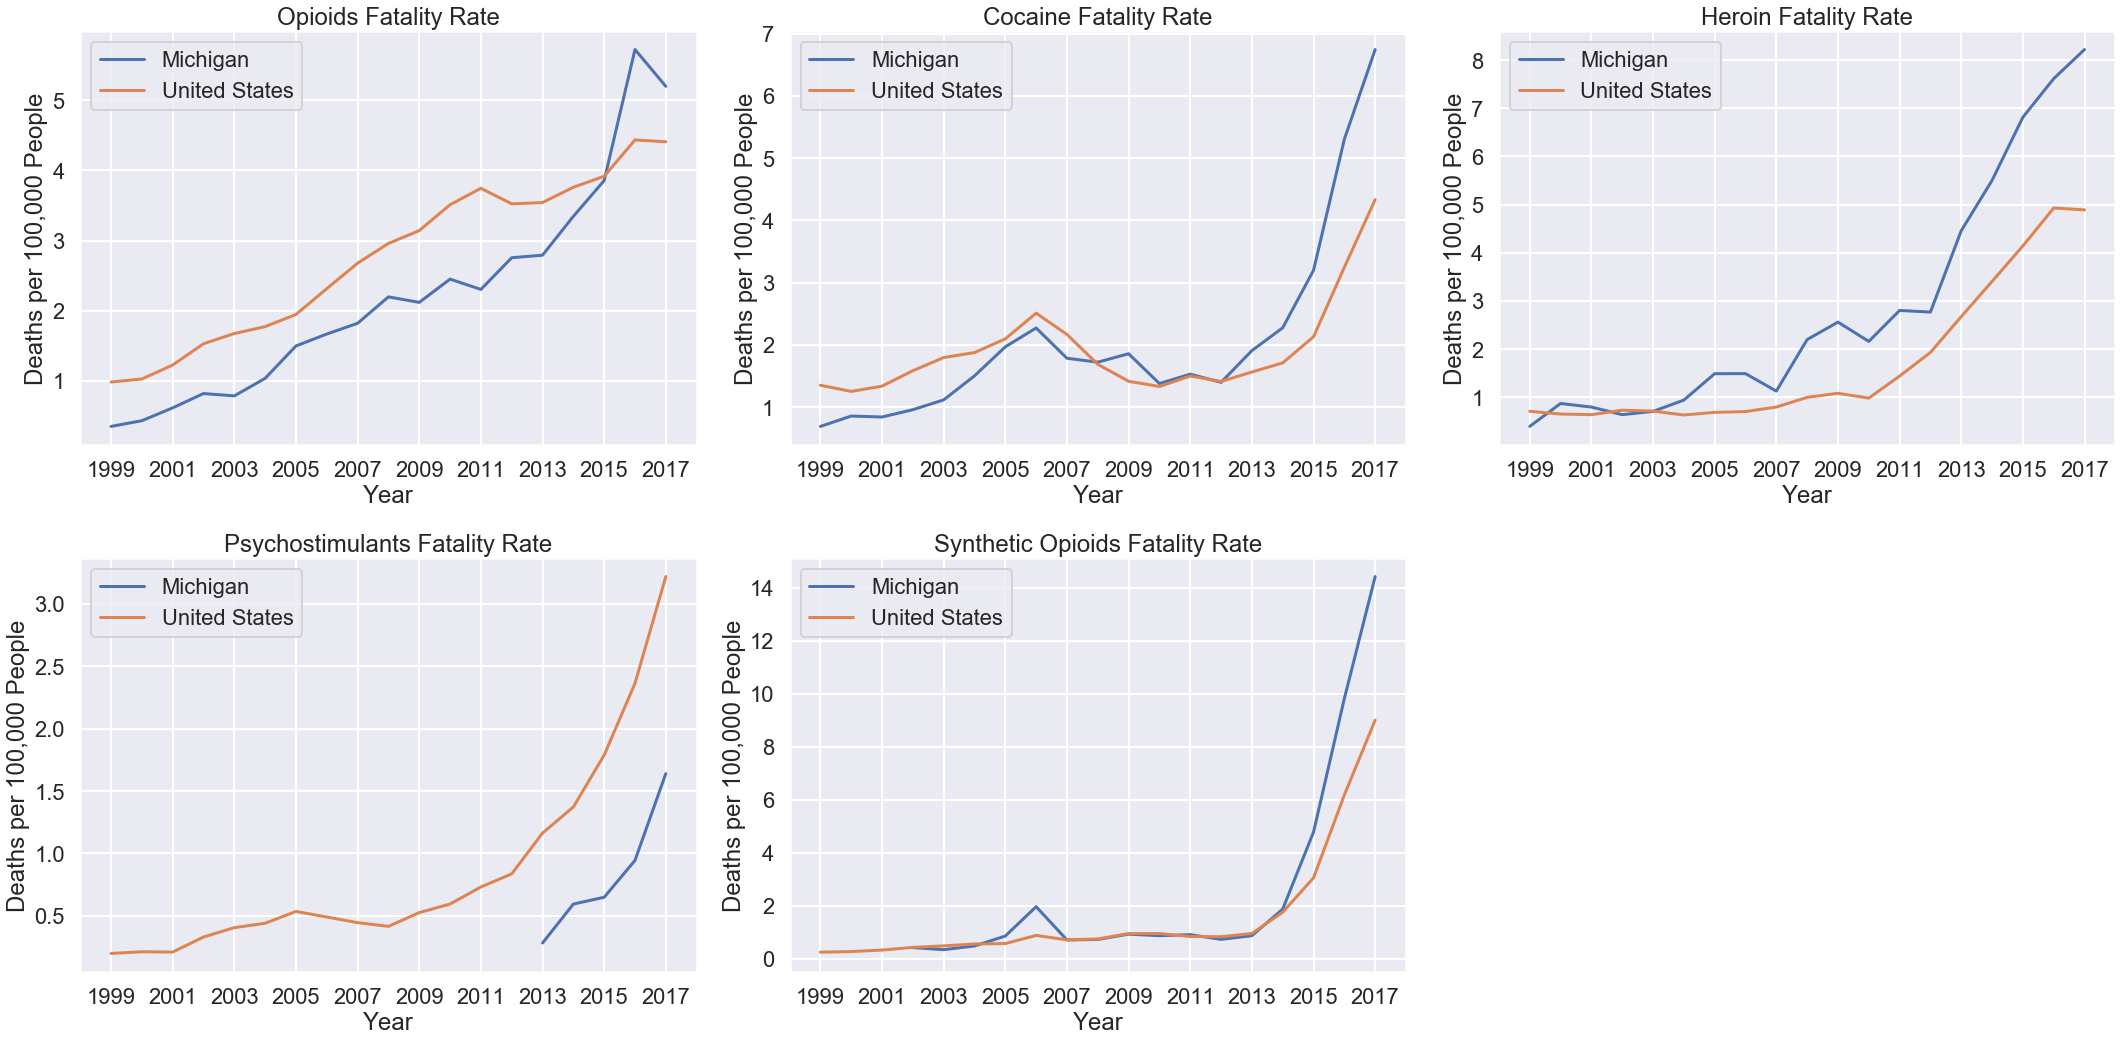

In [50]:
fig4.savefig("./images/DrugFatalityMI_US.jpg")
fig4

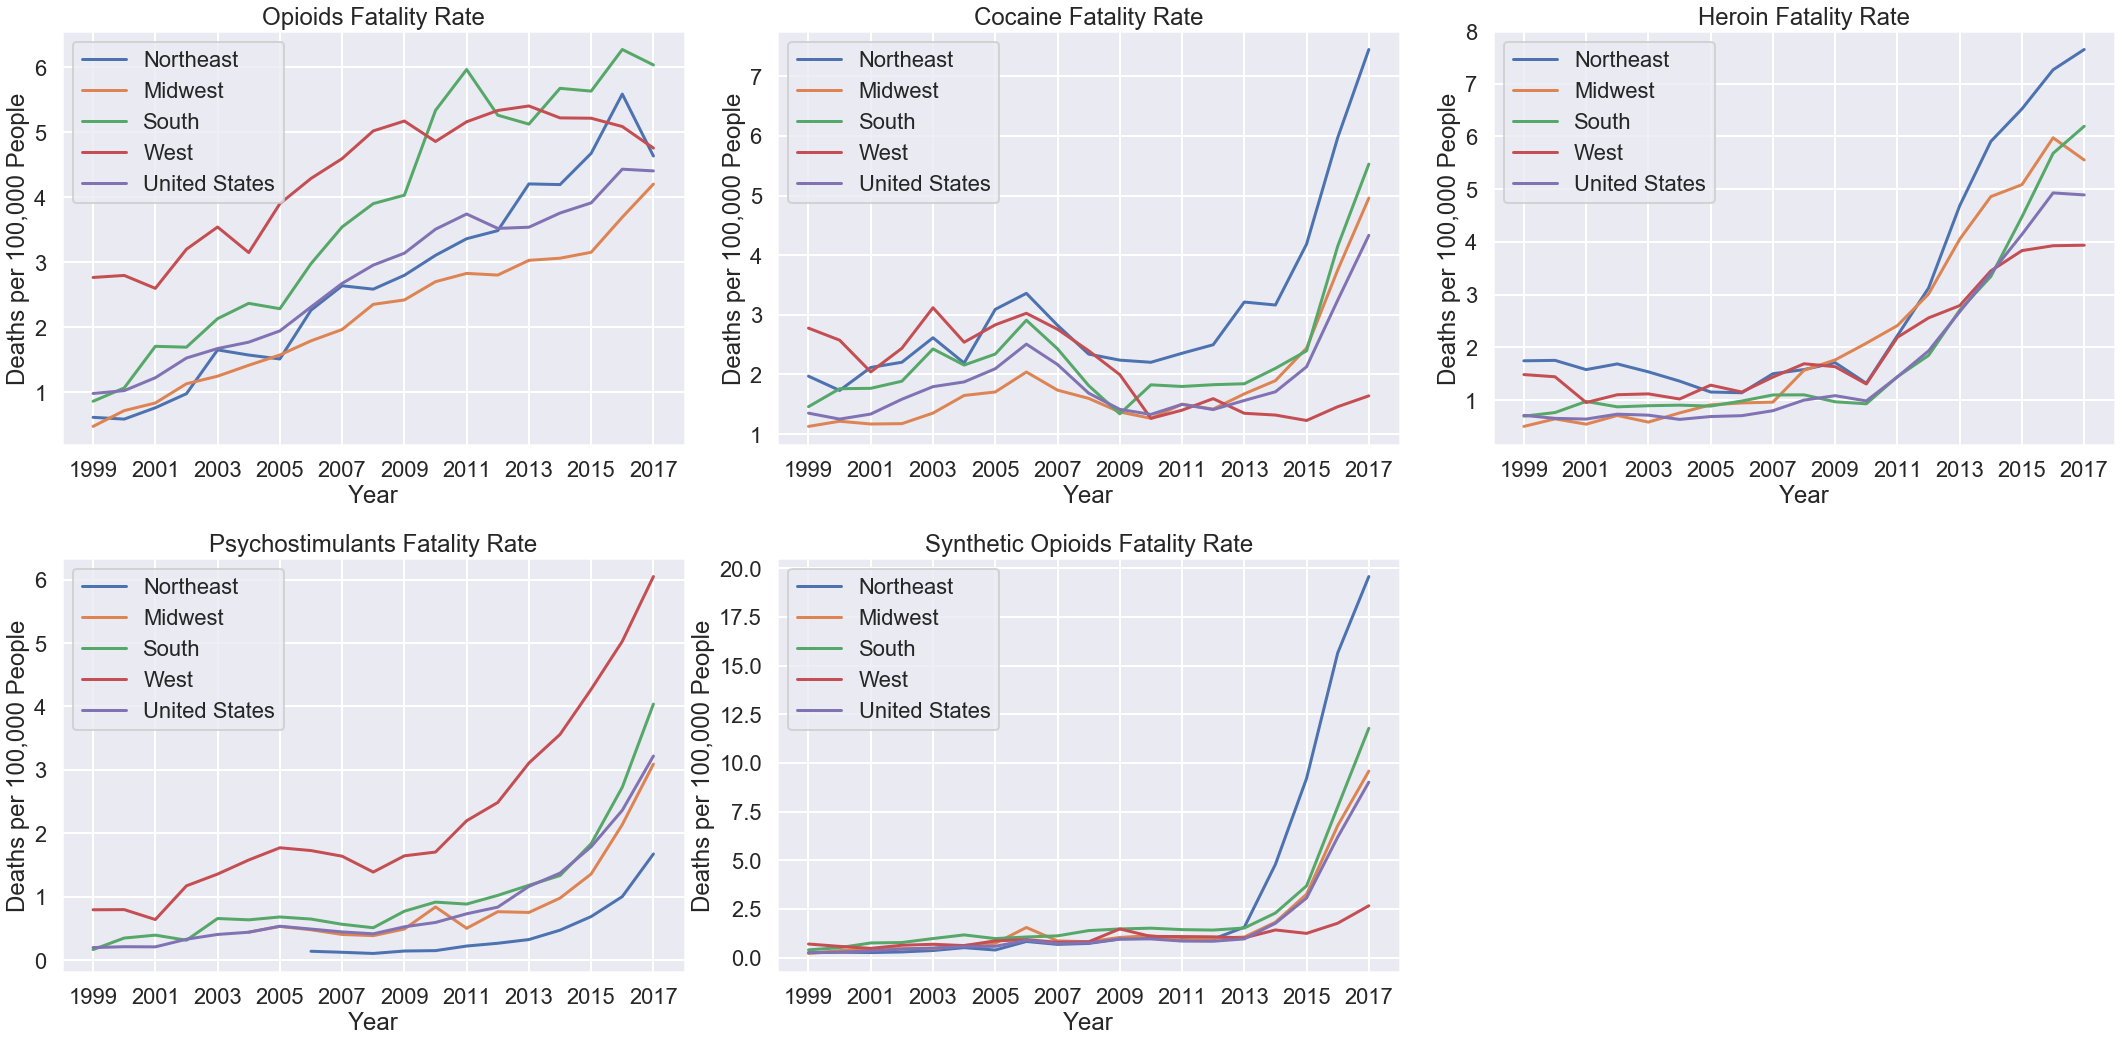

In [51]:
fig6.savefig("./images/DrugFatalityRegions.jpg")
fig6

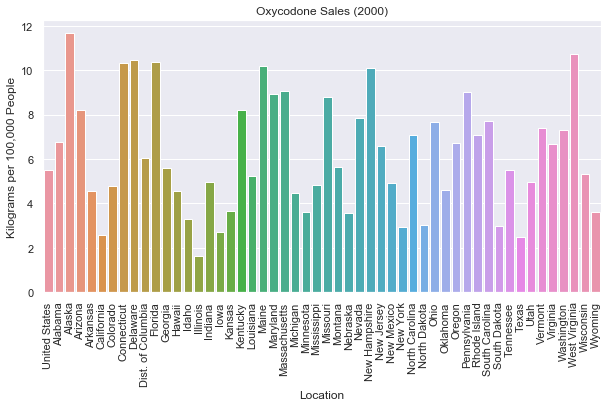

In [52]:
fig11.savefig("./images/OxySales2000.jpg")
fig11

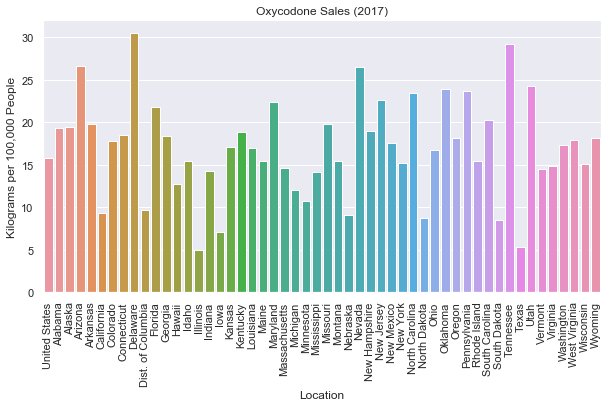

In [53]:
fig12.savefig("./images/OxySales2017.jpg")
fig12

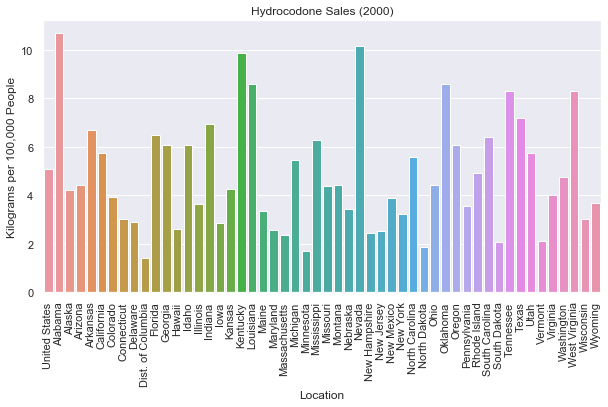

In [54]:
fig13.savefig("./images/HydSales2000.jpg")
fig13

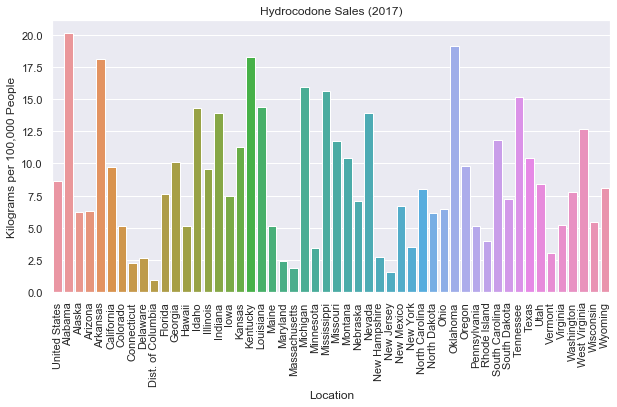

In [55]:
fig14.savefig("./images/HydSales2017.jpg")
fig14

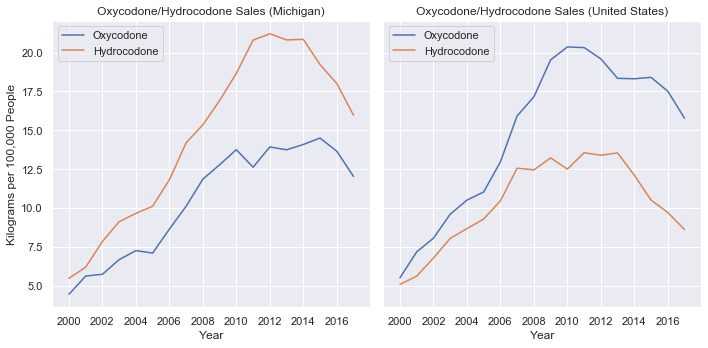

In [56]:
fig15.savefig("./images/DrugSalesMI_US.jpg")
fig15

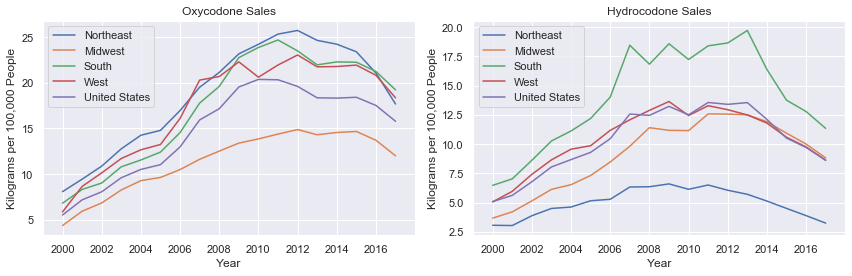

In [57]:
fig17.savefig("./images/DrugSalesRegions.jpg")
fig17

### Oxycodone Metabolism
___
In the first simple model, the normal dosage of 10 mg every 12 hours of oxycodone results in blood concentration levels that is almost entirely in the therapeutic window, meaning that oxycodone does its job properly as a painkiller and the patient is not likely to have any negative side-effects. 

In the second model, the patient also takes 600 mg of ritonavir every 12 hours as prescribed to treat HIV in addition to taking 10 mg oxycodone every 12 hours to treat pain. This time, however, the blood concentration levels of oxycodone lie almost entirely in the dangerous region, indicating that the patient has a much higher risk of a fatal overdose and likely has some nasty side-effects. The reason for this can be seen in the graph of the relative concentration of active CYP3A4; it plummets to 0 almost immediately after ritonavir is absorbed into the body. Ritonavir is a potent inhibitor and prevents the oxycodone from being metabolized and eliminated from the bloodstream. However, when the concentration of ritonavir drops as it is eliminated from the body, the active CYP3A4 concentration rises once more and the oxycodone starts to get metabolized.

In the final model, there is no inhibitor present but the patient also takes 2 mg of Xanax (Alprazolam) every 12 hours to treat anxiety in addition to his normal 10 mg every 12 hours dose of oxycodone. Compared to the simple model, it is evident that the blood concentration of oxycodone is substantially higher than that of the simple model and actually spends a few hours at dangerously high levels, increasing the risk of a fatal overdose. The risk is only compounded by the significantly high blood concentration of alprazolam that almost breaches the upper threshold of the therapeutic window. The reason for the high levels of each drug can be seen in the plot of relative concentrations of CYP3A4, which is involved in the metabolism of both drugs. As the enzyme oscillates between metabolizing the competing substrates, the end result is a slower metabolism of each drug.

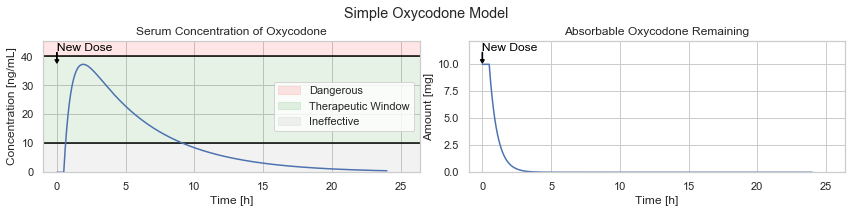

In [58]:
fig21.savefig("./images/simple1dose.jpg")
fig21

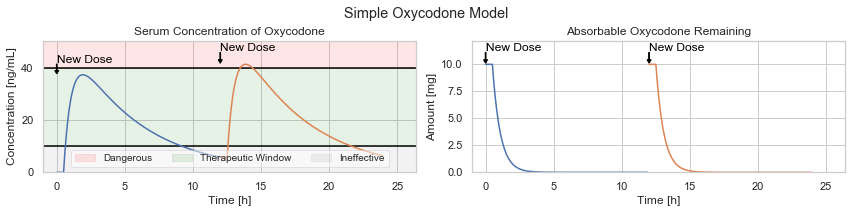

In [59]:
fig22.savefig("./images/simple2doses.jpg")
fig22

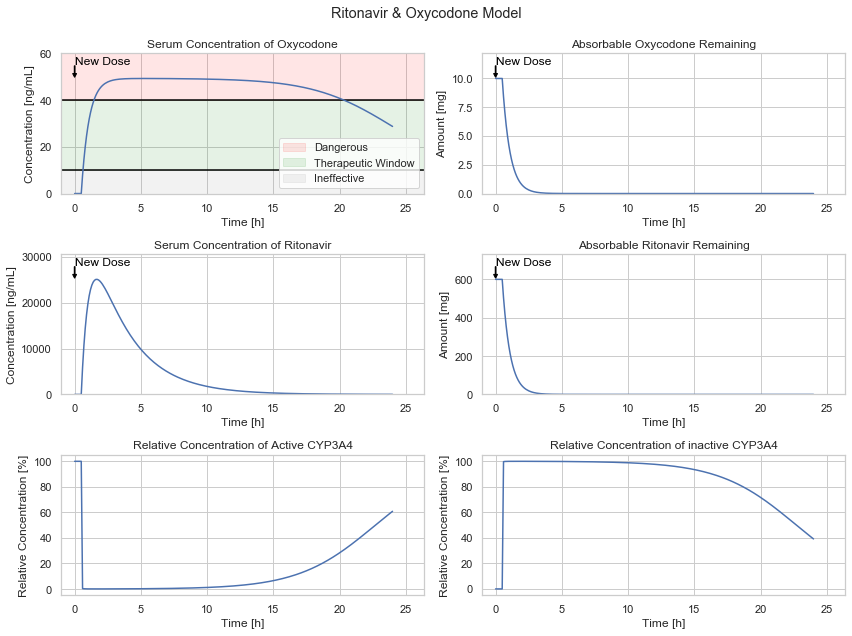

In [60]:
fig31.savefig("./images/CYP1dose.jpg")
fig31

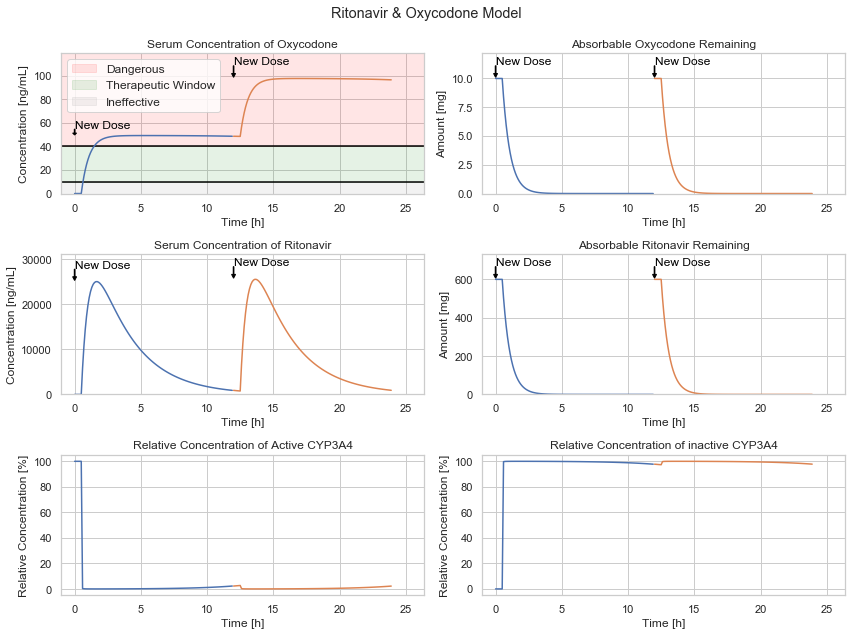

In [61]:
fig32.savefig("./images/CYP2doses.jpg")
fig32

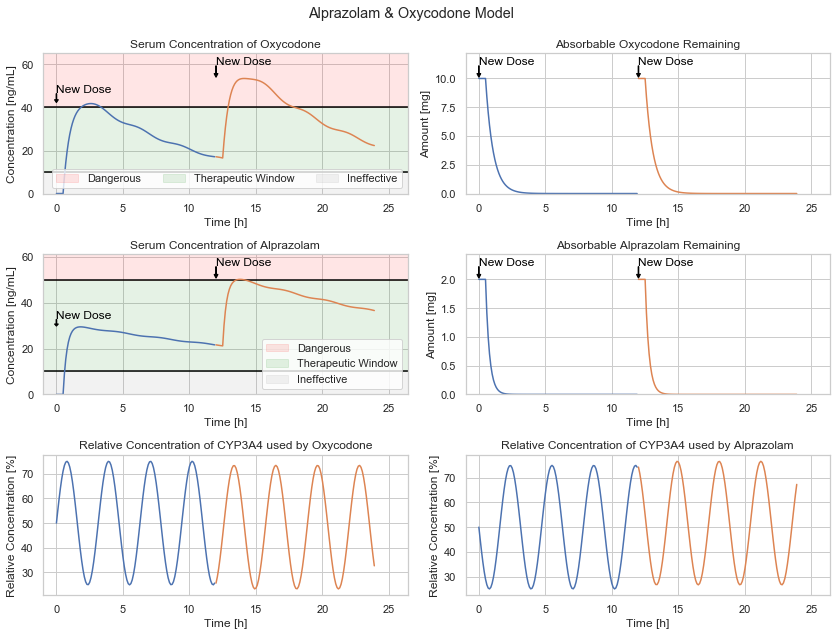

In [62]:
fig41.savefig("./images/Benzo1dose.jpg")
fig42

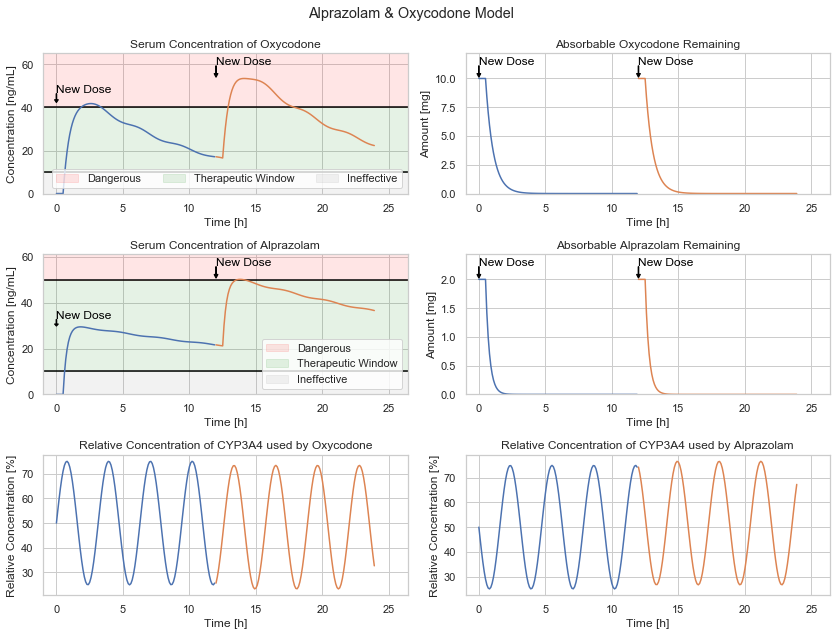

In [63]:
fig42.savefig("./images/Benzo2doses.jpg")
fig42

## Discussion and Conclusion

#### Opioid Crisis
* Is the opioid crisis an issue and are there some parts of the country that are more impacted than others?

My analysis shows that the opioid crisis is definitely an issue since the fatality rates of opioids have increased by 348.22% in the United States from 0.98359 to 4.40863 deaths per 100,000 people from 1999 to 2017. Any issue that causes the number of deaths to more than quadruple is most definitely a crisis. While the rate of fatality has slowed down in its increase since 2011, I still think it is important for research to continue to help solve the issue as public awareness increases. While the opioid crisis seems to increase across the country, until 2010, the West had considerably higher fatalities per 100,000 people attributed to opioids. Since 2010, the South seems to have higher fatality rates. Northeast comes up third and the Midwest has the lowest fatality rate per 100,000 people. When it comes to synthetic opioids, however, the Northeast is almost twice as affected as the next closest region, with about 20 deaths per 100,000 people in 2017. Next is the South with about 12 deaths per 100,000 people, followed closely by the Midwest with about 10 deaths per 100,000, and finally the West with only about 2.5 deaths per 100,000 people.
* How has the fatality of opioids changed over the last two decades with respect to other closely associated drugs?

From 1999 to 2017, the fatality rate of opioids has gone up 1381.93% in Michigan and 348.22% in the United States, with increases from 0.35082 to 5.19889 deaths per 100,000 people and from 0.98359 to 4.40863 deaths per 100,000 people for Michigan and the United States, respectively. In fact, the fatality rates of all five categories of drugs have increased dramatically since 1999 in both Michigan, the United States, and in each region of the United States. Specifically for opioids, the mean fatality rate has increased from 0.6163 to 4.6373 deaths per 100,000 people in the Northeast, 0.4767 to 4.2059 deaths per 100,000 people in the Midwest, 0.8634 to 6.0394 deaths per 100,000 people in the South, and 2.7689 to 4.7590 deaths per 100,000 people in the West. Synthetic opioids' US fatality rate has been close to 1 death per 100,000 people until about 2013 when it began to skyrocket to about 9 deaths per 100,000 people in 2017. Likewise, heroin's US fatality rate increased slowly from close to 0 deaths per 100,000 people in 1999 to about 1 death per 100,000 people in 2010 before skyrocketing to 5 deaths per 100,000 in 2017. Cocaine's US fatality rate spike up from about 1 death per 100,000 people in 1999 to 2.5 deaths per 100,000 people in 2006 before dropping back down to 1 death per 100,000 people by 2011, before skyrocketing to a little over 4 deaths per 100,000 people in 2017. Psychostimulants' US fatality rate remained under 0.5 deaths per 100,000 people before 2009, when it began to spike up to 3.5 deaths per 100,000 people by 2017. It seems as if the rate of fatality rate change decreased for natural opioids when it increased for every other drug, beginning in about 2009-2012.
* How has the sale of opioids changed in the last two decades?

From 2000 to 2017, Oxycodone sales have gone up 170.5% in Michigan and 186.27% in the entire United States, with increases from 4.44692 to 12.02877 kilograms per 100,000 people and from 5.51069 to 15.77549 kilograms per 100,000 people for Michigan and the United States, respectively. Additionally, oxycodone sales have increased from 8.0703 to 17.6647 kilograms per 100,000 people in the Northeast, 4.3599 to 11.9954 kilograms per 100,000 people in the Midwest, 6.8070 to 19.2167 kilograms per 100,000 people in the South, and 5.8520 to 18.3413 kilograms per 100,000 people in the West. 
Likewise, from 2000 to 2017, hydrocodone sales have increased by 191.81% in Michigan and 69.39% overall in the United States, with increases from 5.47137 to 15.96582 kilograms per 100,000 people and from 5.08323 to 8.6105 kilograms per 100,000 people for Michigan and the United States, respectively. Hydrocodone sales have increased from 3.0586 to 3.2426 kilograms per 100,000 people in the Northeast, 3.6689 to 8.8182 kilograms per 100,000 people in the Midwest, 6.4696 to 11.3394 kilograms per 100,000 people in the South, and 5.0613 to 8.6178 kilograms per 100,000 people in the West. 
However, around 2011-2012, both oxycodone and hydrocodone sales began to decrease with US highs of about 20 kilograms per 100,000 people for oxycodone and 13 kilograms per 100,000 people for hydrocodone. This is about the same time that the rate of increase in fatality rates slowed down for oxycodone. As such, I suspect that the decreased sales of oxycodone and hydrocodone are a contributing factor. However, at the same time, the fatality rates for heroin, cocaine, psychostimulants and synthetic opioids have all spiked. So, another reason could be that people have transitioned from opioids to harder drugs and die from those instead. 


The sole obstacle that I encountered when attempting to visualize the opioid crisis was making graphs of drug fatality rates and drug sales of each region (Northeast, Midwest, South, and West). The issue was that each region had multiple states so I couldn't just plot lines. Instead, I had to take the mean value of each region for each year and create a separate, plottable list. Next time, I would try transposing the data frame like we did with the GDP in-class assignment and see if it would be easier to plot. 

While looking at the upward trend in fatality rate and sales for nearly every drug from 1999/2000 to 2017 and change in rate at around 2009-2012, I was curious what caused this sudden change in rates. In the future, I would like to overlay the average family's income in each year to see if any specific economic impacts like the 2008 recession could have impacted the usage of opioids and other drugs. Additionally, I think it would be neat if I could make a density map of fatality rates across the five major cities in each US state and how the densities change over time.

#### Oxycodone Metabolism
* What can help explain the high rates of overdoses for opioids?

I think that the high rates of overdoses for opioids can be explained by the narrow range of the therapeutic window. My literature search showed the window as 10 ng/ml to 40 ng/mL. Even at the base dose of 10 mg every 12 hrs in my simple model, it partially crosses the upper threshold. With a slight increase in dosage or a lower time gap between doses, the curve would be at dangerously high levels, increasing the risk of a fatal overdose. Additionally, the blood concentration of the drug can be easily varied by each patient's K<sub>absorption</sub>, which can fluctuate at different times of the day depending on the pH of the stomach and the amount of food consumed. Furthermore, the the K<sub>elimination</sub> varies person to person depending on how active the gene coding for CYP3A4 is. Since the activity of CYP3A4 dictates the rate of elimination, an inhibitor or a competing substate and also increase the blood concentration levels to dangerous levels, as shown in model two and three.
* How does the presence of a CYP3A4 inhibitor affect the metabolism of oxycodone?

The presence of a CYP3A4 indicator severely slows the metabolism of oxycodone. This is evident in model two, in which ritonavir acts as a potent inhibitor of CYP3A4. The result in that the blood concentration of oxycodone jumps into dangerously high levels, increasing the risk of a fatal overdose. The graph of the relative concentration of active CYP3A4 shows the effect that ritonavir has on the CYP3A4; it plummets to 0 almost immediately after ritonavir is absorbed into the body but slolwly increases when ritinovir is removed from the body. When the active CYP3A4 levels are non-zero, oxycodone finally starts to get metabolized. As such, the presence of an inhibitor makes it take longer to eliminate oxycodone from the body.
* How does a competing substrate like alprazolam affect the metabolism of oxycodone and can this explain why more than 30 percent of overdoses involving opioids also involve benzodiazepines?

My third model shows that the presence of a competing substrate (alprazolam) also slows down the metabolism of oxycodone. By comparing to the simple model, it is evident that it takes much longer to get the blood concentration of oxycodone back to zero with the simultaneous metabolism of alprazolam than without. Additionally, the blood concentration of oxycodone is substantially higher with the simultaneous metabolism of alprazolam than without. In fact, the blood concentration of oxycodone is actually at dangerously high levels for a few hours, increasing the risk of a fatal overdose. This elevated risk and the common concurrent usage of alprazolam can help explain the statistic that more than 30 percent of overdoses involving opioids also involve benzodiazepines.


One of the obstacles that I ran into was accurately modeling the concentrations of the active CYP3A4 and inactive CYP3A4 in my second odeint model of oxycodone metabolism inhibited by ritonavir. For competitive inhibition of enzyme E by inhibitor I, which results in inactive EI, $Ki = \frac{[E][I]}{[EI]}$. I derived that $\frac{dE}{dt} = - [E]^2\frac{dI}{dt}$ if I let $[E] + [EI] = 1$. This would mean that the rate of the relative concentration of active CYP3A4 would depend on the rate of concentration of ritonavir (the inhibitor). However, odeint made it impossible to define the derivative of each dependant on the other because one of the derivatives hadn't been defined yet. As such, I had to define the derivative of ritonavir without the derivative of active CYP3A4 and use this derivative to define the derivative of active CYP3A4. Afterward, I updated the derivative of ritonavir using the derivative of CYP3A4. While this approach seemed to work, it is not perfect and does not accurately reflect the true rates of change. In the future, I would try to see if there is an odeint-like solver but for more complex differential equations.

Another one of the obstacles that I had was figuring out a way to model which how much of CYP3A4 would metabolize oxycodone and how much would metabolize alprazolam because both were competing substrates. I couldn't find a way to make it depend on the concentrations of each substrate because, in my model, the amount of each CYP3A4 was relative and added up to 100%. As such, I had to settle for making the CYP3A4 oscillate between the two substrates using a cosine function as its derivative. In the future, I would if I could keep a single compartment and try to use np.random.randn to model what fraction (0-1) of the CYP3A4 would assist in the metabolism of oxycodone and the rest would assist in the metabolism. However, I still think that finding a way to relate the dEdt to the relative concentrations of each type of substrate would be a better idea but I simply don't know how to do so.

When I first began this project, I envisioned having a compartment for each metabolite of oxycodone and using an enzymes's k<sub>reaction</sub> to model the rates of the overall metabolism of oxycodone as it gets metabolized at different rates to different metabolites before being excreted from the system. However, when I began my research, I couldn't find any parameters for the individual reactions of the metabolites. As such, I had to greatly simplify my model. In the future, I would try to see if I could find enough data model not only the blood concentration but also the concentration at the drug's targeted region. For example, for oxycodone, I could try to find the concentration of the drug that actually reaches the brain. I suspect that odeint might not work for this model and I might have to familiarize myself with actual pharmacokinetic modeling software.
 
 
### Conclusion
___

The three main points to take away from this are:
1. The opioid crisis is big issue in society today and parts of the country like the South and the West suffer from natural opioid overdoses while other parts of the country like the Northeast suffers more with the synthetic opioids like fentanyl.
2. The decrease sales of oxycodone and hydrocodone since 2011 seem to be a contributing factor to decreasing rate of increase in fatality rates of opioids since 2011.
3. The three models together show that the narrow therapeutic range of oxycodone makes it a dangerous drug to take as even a slight deviation from dosage or concurrent treatment with other drugs that are inhibitors or competing substrates of the CYP3A4 enzyme will spike the blood concentrations of oxycodone and can have fatal consequences.

### References

* Abadi, Mark. “Even the US Government Can't Agree on How to Divide up the States into Regions.” Business Insider, Business Insider, 10 May 2018, www.businessinsider.com/regions-of-united-states-2018-5.
* Brahma, Dhriti. “Pharmacokinetics - Drug Absorption, Drug Distribution, Drug Metabolism, Drug Excretion.” *LinkedIn SlideShare*, 2 Sept. 2010, www.slideshare.net/drdhriti/pharmacokinetics-drug-absorption-distri.
* “Extravascular Routes of Drug Administration.” *Basic Pharmacokinetics*, by Sunil S. Jambehkar and Philip J. Breen, 2nd ed., Pharmaceutical Press, 2012, pp. 105–126, www.pharmpress.com/files/docs/Basic%20Pharmacokinetics%20sample.pdf.
* “Highlights of Prescribing Information of Oxycodone Hydrochloride Oral Solution USP.” *Boehringer-Ingelheim.com*, Boehringer Ingelheim International GmbH, Oct. 2014, www.docs.boehringer-ingelheim.com/Prescribing%20Information/PIs/Roxane/Oxycodone%20HCl%20OS%205mg%20per%205mL%20Flavored/10009007%20Oxycodone%20HCl%20OS%205mgper5mL%20Flavored.pdf.
* Hossain, Md Amin, et al. “Inhibition of Human Cytochromes P450 in Vitro by Ritonavir and Cobicistat.” *Journal of Pharmacy and Pharmacology*, vol. 69, no. 12, 26 Aug. 2017, pp. 1786–1793., doi:10.1111/jphp.12820.
* “How Does The Body Metabolize Medication?” Orlando Clinical Research Center, Orlando Clinical Research Center, 22 May 2019, www.ocrc.net/how-does-the-body-metabolize-medication/. 
* Huddart, Rachel, et al. “PharmGKB Summary: Oxycodone Pathway, Pharmacokinetics.” *Pharmacogenetics and Genomics*, PharmGKB, 2018, www.pharmgkb.org/pathway/PA166170927.
* “Human Body Weight.” *Wikipedia*, Wikimedia Foundation, 2 Nov. 2019, www.en.wikipedia.org/wiki/Human_body_weight#Sports.
* Kao, Ming. “Drug-Herb-Gene CYP3A4 Interactions.” *Medium*, A Medium Corporation, 11 Feb. 2019, www.medium.com/dr-ming-kao/drug-herb-gene-cyp3a4-interactions-5eb6c7c80b2f.
* Kelly. “Prescription Drugs: The Therapeutic Range and DUI.” *Cal-Tox.org*, California Association of Toxicologists, Feb. 2008, www.cal-tox.org/Downloads/proceedings/0208/KellyFeb08.pdf.
* Kinnunen, Mari, et al. “Updated Clinical Pharmacokinetics and Pharmacodynamics of Oxycodone.” *Clinical Pharmacokinetics*, vol. 58, no. 6, 17 Jan. 2019, pp. 705–725., doi:10.1007/s40262-018-00731-3.
* Kurra, Pallavi. “Compartment Modelling.” *LinkedIn SlideShare*, 2 Sept. 2014, www.slideshare.net/PallaviKurra/compartment-modelling.
* Laughren, Thomas P. “Xanax Label.” *Accessdata.fda.gov*, US Food &amp; Drug Adminstration, 23 Aug. 2011, www.accessdata.fda.gov/drugsatfda_docs/label/2011/018276s045lbl.pdf.
* “Matplotlib.pyplot.arrow.” *Matplotlib 3.1.1 Documentation*, The Matplotlib Development Team, 28 Oct. 2019, www.matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.arrow.html.
* Moradi, Mohammad, et al. “Use of Oxycodone in Pain Management.” *Anesthesiology and Pain Medicine*, vol. 1, no. 4, 2 Mar. 2012, pp. 262–264., doi:10.5812/aapm.4529.
* M. Whirl-Carrillo, E.M. McDonagh, J. M. Hebert, L. Gong, K. Sangkuhl, C.F. Thorn, R.B. Altman and T.E. Klein. "Pharmacogenomics Knowledge for Personalized Medicine" *Clinical Pharmacology & Therapeutics* (2012) 92(4): 414-417. 
* National Center for Biotechnology Information. PubChem Database. Ritonavir, CID=392622, https://pubchem.ncbi.nlm.nih.gov/compound/Ritonavir (accessed on Dec. 2, 2019)
* “NORVIR (Ritonavir) Label.” *Accessdata.fda.gov*, US Food &amp; Drug Adminstration, 2017, www.accessdata.fda.gov/drugsatfda_docs/label/2017/209512lbl.pdf.
* “Opioid Overdose Crisis.” Drugabuse.gov, National Institute on Drug Abuse, 22 Jan. 2019, www.drugabuse.gov/drugs-abuse/opioids/opioid-overdose-crisis.
* Oshiro, Connie. “PharmGKB Summary: Benzodiazepine Pathway, Pharmacokinetics.” *PharmGKB*, PharmGKB, 2009, www.pharmgkb.org/pathway/PA165111375.
* “Oxycontin Label.” *Accessdata.fda.gov*, US Food &amp; Drug Adminstration, 2008, www.accessdata.fda.gov/drugsatfda_docs/label/2008/020553s059lbl.pdf.
* Parra, Mayra A. Sandoval, et al. “Bioanalytical Evaluation of Dried Plasma Spot Microsampling Methodologies in Pharmacokinetic Studies Applying Acetaminophen as Model Drug.” Journal of Applied Bioanalysis, vol. 2, no. 1, 13 Jan. 2016, pp. 25–37., doi:10.17145/jab.16.005.
* Probes, Lawrence M. “Opioid Blood Levels in Chronic Pain Management.” Practical Pain Management, Remedy Health Media, LLC, 20 Dec. 2011, www.practicalpainmanagement.com/treatments/pharmacological/opioids/opioid-blood-levels-chronic-pain-management?page=0%2C3.
* “Ritonavir.” *Selleckchem.com*, Selleck Chemicals, www.selleckchem.com/products/Ritonavir.html.
* Sager, Jennifer E., et al. “Physiologically Based Pharmacokinetic (PBPK) Modeling and Simulation Approaches: A Systematic Review of Published Models, Applications, and Model Verification.” *Drug Metabolism and Disposition*, vol. 43, no. 11, 21 Aug. 2015, pp. 1823–1837., doi:10.1124/dmd.115.065920.
* Sevrioukova, Irina F, and Thomas L Poulos. “Structure and Mechanism of the Complex between Cytochrome P4503A4 and Ritonavir.” *Proceedings of the National Academy of Sciences of the United States of America*, National Academy of Sciences, 26 Oct. 2010, www.ncbi.nlm.nih.gov/pubmed/20937904/.
* Shou, Magang, et al. “Enzyme Kinetics of Cytochrome P450-Mediated Reactions.” Current Drug Metabolism, vol. 2, no. 1, 2000, pp. 17–36., doi:10.2174/1389200013338784.
* Smith, Howard S. “Opioid Metabolism.” *Mayo Clinic Proceedings*, vol. 84, no. 7, July 2009, pp. 613–624., doi:10.1016/s0025-6196(11)60750-7.
* Smith, R. B., et al. “Pharmacokinetics and Pharmacodynamics of Alprazolam after Oral and IV Administration.” *Psychopharmacology*, vol. 84, no. 4, Dec. 1984, pp. 452–456., doi:10.1007/bf00431449.
* “The Opioid Epidemic Continues to Ravage America.” The Economist, The Economist Newspaper, 24 Apr. 2019, www.economist.com/graphic-detail/2019/04/24/the-opioid-epidemic-continues-to-ravage-america.
* “What Is the U.S. Opioid Epidemic?” HHS.gov, Department of Health and Human Services, 4 Sept. 2019, www.hhs.gov/opioids/about-the-epidemic/index.html.
* “Xanax Dosage Guide.” *Drugs.com*, Drugs.com, 2 Dec. 2019, www.drugs.com/dosage/xanax.html.

Notes from the readings below were accessed at http://www.columbia.edu/itc/gsas/g9600/2004/GrazianoReadings/Drugabs.pdf
* Gibaldi, M. *Biopharmaceutics and Clinical Pharmacokinetics*. 3rd Edition. Lea & Febiger, Philadelphia, 1984.
* Goldstein, A., Aronow, L. and Kalman, S.M. *Principles of Drug Action: The Basis of Pharmacology*. Chapters 2 and 3. John Wiley & Sons, New York 1974.
* Sipes, IG, Gandolfi, AJ: "Biotransformation of Toxicants." IN, *Toxicology, The Basic Science of Poisons*, Fourth Edition, MO Amdur, J Doull, CD Klaassen, eds., Pergamon Press, New York, 1991, pp. 88-126.
